<a href="https://colab.research.google.com/github/marcomorigi95/Toxic_comment_filter/blob/main/Morigi_Marco_Comment_Toxic_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Overview

Online content moderation has become a major challenge for many platforms, which are facing an increasing volume of potentially harmful comments, where manual moderation of user-generated content has become expensive to manage. A way to automatically filter offensive, threatening or obscene comments without slowing down the user experience is needed. In this case, the ideal solution is to implement an advanced automatic moderation based on Deep Learning technologies that can filter toxic comments in real time to automate and improve the moderation process.

This project will provide an advanced and automated solution for moderating toxic content, significantly improving the quality of online discussions. The system will ensure more efficient and accurate management of comments, offering a safe and inclusive platform for all users.

## Workflow Steps


- Dataset Analysis with Related EDA on Raw and Clean Data
- Development of Appropriate Preprocessing
- Benchmark Model
- Deep Learning Models (Dense, GRU, LSTM)
- Data Augmentation
- Pre-trainded Embeddings (FastText, Glove)
- Final Testing
- Conclusions

# Libraries

In [ ]:
# ----------------------------------------
# Install necessary external libraries
# ----------------------------------------
!pip install contractions
!pip install deep_translator
!pip install nlpaug

# ----------------------------------------
# Data Handling and Preprocessing Libraries
# ----------------------------------------
import pandas as pd
import numpy as np
import time
from collections import Counter

# ----------------------------------------
# File Handling
# ----------------------------------------
import os
import pickle
import zipfile
import gdown
from google.colab import drive

#---------------------------------------
# NLP Libraries
#---------------------------------------
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import contractions
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# ----------------------------------------
# Visualization Libraries
# ----------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ----------------------------------------
# ML Preprocessing and Feature Engineering
# ----------------------------------------
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight

# ----------------------------------------
# Model Evaluation and Metrics
# ----------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# ----------------------------------------
# Deep Learning Libraries
# ----------------------------------------
import keras
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.layers import GlobalAveragePooling1D, Dropout, BatchNormalization, SpatialDropout1D
from tensorflow.keras.layers import LSTM, GRU, Dense, Bidirectional
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import clone_model
# ----------------------------------------
# Back Translation for Data Augmentation
# ----------------------------------------
from deep_translator import GoogleTranslator

# ----------------------------------------
# Synonym Augmentation
# ----------------------------------------
import nlpaug.augmenter.word as naw
import random

# ----------------------------------------
# FastText Embeddings
# ----------------------------------------
from gensim.models import FastText as gensimFastText

# ----------------------------------------
# Avoid Warnings
# ----------------------------------------
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


# Utils

In [ ]:
# This cell is for the final testing part, ingore it.
custom_stop_words = {
    'would', 'no', 'one', 'like', 'just', 'they', 'dont', 'he', 'which', 'any', 'been', 'should',
    'we', 'more', 'some', 'other', 'who', 'here', 'also', 'his', 'think', 'because', 'know', 'how',
    'am', 'people', 'only', 'why', 'out', 'when', 'were', 'use', 'up', 'then', 'may', 'time',
    'them', 'being', 'their', 'now', 'than', 'get', 'utc', 'even', 'make', 'thanks', 'could',
    'does', 'well', 'want', 'such', 'way', 'these', 'first', 'pages', 'new', 'need', 'go', 'help',
    'say', 'thank', 'section', 'edits', 'look', 'read', 'image', 'take', 'still', 'two', 'over',
    'fact', 'him', 'back', 'right', 'youre', 'link', 'said', 'going', 'list', 'without', 'stop',
    'our', 'content', 'under', 'added', 'however', 'note', 'place', 'sure', 'case','wikipediacom',
    'seems', 'using', 'done', 'actually', 'better', 'ask', 'reason', 'wiki', 'wikipedia',
    'articles', 'hi', 'article', 'hello', 'im', 'talk', 'page', 'pages', 'wp', 'see', 'did',
    'please', 'user', 'edit','editing','add', 'editor', 'name', 'discussion', 'someone',
    'comment', 'question', 'source', 'year', 'month', 'day', 'information', 'deletion'
}
stop_words = set(stopwords.words('english'))
stop_words.update(custom_stop_words)

In [ ]:
class TextCleaner(BaseEstimator, TransformerMixin):
    """
    A custom transformer for cleaning and preprocessing text data.

    This class implements text cleaning operations such as:
    - Converting text to lowercase
    - Removing stopwords (standard English stopwords plus custom stopwords provided by the user)
    - Lemmatizing words (optional)
    - Removing unwanted characters like URLs, mentions, hashtags, and non-alphabetic symbols
    - Handling repeated characters and single-character tokens

    Args:
        lemming (bool, optional): Whether to apply lemmatization to the text. Default is False.
        stop_words (set, optional): Remove a set of stopwords from the text. Default is None.

    Methods:
        fit(X, y=None):
            Returns the transformer instance itself.
            This method does not perform any fitting, as no training is needed.

        clean_text(text):
            Cleans and preprocesses a single string of text by applying the defined text cleaning steps.

        transform(X, y=None):
            Applies the `clean_text` method to a pandas DataFrame or a single string.
            If a DataFrame is provided, it operates on the 'comment_text' column.

    """

    def __init__(self, lemming=False, stop_words=None):
        self.lemming = lemming
        self.stop_words = stop_words
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        """Returns the transformer instance."""
        return self

    def clean_text(self, text):
        """
        Cleans and preprocesses the input text.

        Args:
            text (str): The text to be cleaned.

        Returns:
            str: The cleaned text.
        """
        text = str(text).lower()

        # Checks for single-character words and removes extra spaces. "h e l l o" -> "hello"
        if all(len(token) == 1 for token in text.split()):
            text = " ".join("".join(word.split()) for word in text.split("  "))

        # Remove consecutive duplicate words
        text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

        # Remove unwanted characters, numbers etc.
        text = re.sub(r'http\S+|<.*?>|@\w+|\n|#\w+|\d+|[^a-zA-Z0-9\s]', ' ', text)

        # Limits consecutive repeated characters to exactly two instances.
        text = re.sub(r'(.)\1{2,}', r'\1\1', text)

        if self.stop_words is not None:
            text = " ".join([word for word in text.split() if word not in self.stop_words])

        if self.lemming:
            text = " ".join([self.lemmatizer.lemmatize(word) for word in text.split()])

        # Remove single-character tokens (length == 1)
        text = " ".join([word for word in text.split() if len(word) > 1])

        # Remoce extra spaces
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def transform(self, X, y=None):
        """
        Transforms the input data by cleaning the text.

        If the input is a string, it will be cleaned directly. If the input is a pandas DataFrame,
        it will apply the cleaning process to the 'comment_text' column.

        Args:
            X (str or pd.DataFrame): The text data to be transformed. If a DataFrame, it is assumed
                                      to have a column 'comment_text'.
            y (optional): Ignored, only for compatibility with scikit-learn pipelines.

        Returns:
            str or pd.DataFrame: The cleaned text or DataFrame with cleaned text in the 'comment_text' column.
        """
        if isinstance(X, str):
            return self.clean_text(X)

        X['comment_text'] = X['comment_text'].apply(lambda x: self.clean_text(x))
        return X


In [ ]:
class DropUnwantedText(BaseEstimator, TransformerMixin):
    """
    A custom transformer for removing unwanted text from a DataFrame or single string.

    This class implements two main operations to clean text data:
    - Removing duplicate comments (if the input is a DataFrame).
    - Filtering out rows based on text length (keeping only comments with a length of 3 or more characters).

    Args:
        None: This transformer does not require any parameters during initialization.

    Methods:
        fit(X, y=None):
            Returns the transformer instance itself. This method does not perform any fitting, as no training is needed.

        drop_duplicates_text(dataframe):
            Removes duplicate comments from the DataFrame or returns the string as is if input is a string.

        filter_by_length(dataframe):
            Filters out rows where the text length is less than 3 characters, or returns the string as is if input is a string.

        transform(X, y=None):
            Transforms the input data by dropping duplicates and filtering by text length.
            Works for both DataFrames (operating on the 'comment_text' column) and single strings.

    """

    def __init__(self):
        """Initializes the transformer without any specific parameters."""
        pass

    def fit(self, X, y=None):
        """Returns the transformer instance itself."""
        return self

    def drop_duplicates_text(self, dataframe):
        """
        Removes duplicate comments from the input DataFrame.

        Args:
            dataframe (pd.DataFrame or str): The data from which duplicates need to be removed.

        Returns:
            pd.DataFrame or str: The DataFrame with duplicates removed or the original string if the input was a string.
        """
        if isinstance(dataframe, str):
            return dataframe  # If it's a string, just return it as is
        return dataframe.drop_duplicates()

    def filter_by_length(self, dataframe):
        """
        Filters rows by the length of the text in the 'comment_text' column.

        Args:
            dataframe (pd.DataFrame or str): The DataFrame to be filtered or a single string to process.

        Returns:
            pd.DataFrame or str: The DataFrame filtered by text length, or the original string if the input was a string.
        """
        if isinstance(dataframe, str):
            return dataframe  # If it's a string, just return it as is
        return dataframe[dataframe['comment_text'].str.len() >= 3]

    def transform(self, X, y=None):
        """
        Transforms the input data by dropping duplicates and filtering by text length.

        If the input is a string, it processes the string directly. If the input is a DataFrame,
        it operates on the 'comment_text' column to drop duplicates and filter by text length.

        Args:
            X (str or pd.DataFrame): The data to be transformed. If a DataFrame, it is assumed to have a column 'comment_text'.
            y (optional): Ignored, only for compatibility with scikit-learn pipelines.

        Returns:
            str or pd.DataFrame: The transformed text data, either as a string or a DataFrame with filtered text.
        """
        if isinstance(X, str):
            return self.filter_by_length(self.drop_duplicates_text(X))

        df = self.drop_duplicates_text(X)
        df = self.filter_by_length(df)
        return df


In [ ]:
class TestSplit(BaseEstimator, TransformerMixin):
    """
    A custom transformer for splitting a DataFrame into features (X) and labels (y).

    This class is used to separate the 'comment_text' column as the feature set (X)
    and the remaining columns (excluding 'comment_text' and 'sum_injurious') as the label set (y).

    Args:
        None: This transformer does not require any parameters during initialization.

    Methods:
        fit(X, y=None):
            Returns the transformer instance itself. This method does not perform any fitting, as no training is needed.

        df_split_text(X):
            Splits the input DataFrame into feature (X) and label (y) sets.
            The 'comment_text' column is used as features, and all other columns except 'comment_text' and 'sum_injurious' are used as labels.

        transform(X, y=None):
            Transforms the input DataFrame by calling `df_split_text`, returning the feature and label sets.
    """

    def __init__(self):
        """Initializes the transformer without any specific parameters."""
        pass

    def fit(self, X, y=None):
        """Returns the transformer instance itself."""
        return self

    def df_split_text(self, X):
        """
        Splits the input DataFrame into features and labels.

        Args:
            X (pd.DataFrame): The DataFrame to split. Expected to contain a 'comment_text' column and other label columns.

        Returns:
            pd.DataFrame: A DataFrame containing the 'comment_text' column (features).
            pd.DataFrame: A DataFrame containing the remaining columns (labels), excluding 'comment_text' and 'sum_injurious'.
        """
        X_split = X["comment_text"]
        y_split = X.drop(columns=["comment_text", "sum_injurious"])
        return X_split, y_split

    def transform(self, X, y=None):
        """
        Transforms the input DataFrame by splitting it into features (X) and labels (y).

        Args:
            X (pd.DataFrame): The DataFrame to split, expected to contain a 'comment_text' column and other label columns.
            y (optional): Ignored, only for compatibility with scikit-learn pipelines.

        Returns:
            pd.DataFrame: A tuple where the first element is the 'comment_text' column (features),
                          and the second element contains the remaining columns (labels).
        """
        X_split, y_split = self.df_split_text(X)

        return X_split, y_split


In [ ]:
class PreprocessVectorizer(BaseEstimator, TransformerMixin):
    """
    A custom transformer for vectorizing text data into sequences of indices using TensorFlow's TextVectorization layer.

    This class is designed to convert raw text into integer sequences using either character-level or word-level tokenization.
    The text data is transformed into sequences that can be fed into neural networks or other machine learning models.

    Args:
        vocabulary_size (int, optional): The maximum number of tokens to keep in the vocabulary. Default is None, meaning no limit.
        output_sequence_length (int, optional): The desired length of the output sequences.
                                                Sequences will be padded or truncated to this length. Default is 40.
        token_level (str, optional): Specifies the level of tokenization. Can be 'word' or 'character'. Default is 'word'.

    Methods:
        fit(X, y=None):
            Fits the TextVectorization layer on the training data.
            It prepares the vectorizer by adapting it to the input text data.

        transform(X, y=None):
            Transforms the text data into sequences of indices.
            This method uses the fitted vectorizer to convert the text into a sequence format suitable for ML models.

        fit_transform(X, y=None):
            Fits the vectorizer and transforms the data in a single step.
    """

    def __init__(self, vocabulary_size=None, output_sequence_length=40, token_level='word'):
        """Initializes the vectorizer with the specified configuration."""
        self.vocabulary_size = vocabulary_size
        self.output_sequence_length = output_sequence_length
        self.token_level = token_level
        self.vectorizer = None

    def fit(self, X, y=None):
        """
        Fits the TextVectorization layer on the training data.

        Args:
            X (tuple): A tuple where X[0] contains the text data to be vectorized.
            y (optional): Labels (not used in this method).

        Returns:
            self: The fitted vectorizer instance.
        """
        # Extract the text data from the tuple (X[0] contains the text data)
        text_data = X[0]

        if self.token_level == 'character':
            self.vectorizer = TextVectorization(
                max_tokens=self.vocabulary_size,
                split='character',
                output_mode='int',
                output_sequence_length=self.output_sequence_length
            )
        elif self.token_level == 'word':
            self.vectorizer = TextVectorization(
                max_tokens=self.vocabulary_size,
                output_mode='int',
                output_sequence_length=self.output_sequence_length
            )
        else:
            raise ValueError("Invalid token_level. Choose 'word' or 'character'.")

        self.vectorizer.adapt(text_data)  # Apply adapt only here when fitting
        return self

    def transform(self, X, y=None):
        """
        Transforms the text data into sequences of indices.

        Args:
            X (tuple): A tuple where X[0] contains the text data and X[1] contains the labels.
            y (optional): Labels (not used in this method).

        Returns:
            tuple: A tuple containing:
                - The transformed text data as sequences of indices.
                - The unchanged labels (y_split from TestSplit).
        """
        if self.vectorizer is None:
            raise RuntimeError("Vectorizer is not fitted yet. Please call `fit` before `transform`.")

        # Extract the text data from the tuple (X[0] contains the text data)
        text_data = X[0]

        # Transform the text data (X) to sequences of indices
        X_seq = self.vectorizer(text_data)

        # Return the transformed X and the unchanged y
        return X_seq, X[1]

    def fit_transform(self, X, y=None):
        """
        Fits and transforms the data in a single step.

        Args:
            X (tuple): A tuple where X[0] contains the text data to be vectorized and X[1] contains the labels.
            y (optional): Labels (not used in this method).

        Returns:
            tuple: A tuple containing:
                - The transformed text data as sequences of indices.
                - The unchanged labels.
                - The fitted vectorizer instance.
        """
        self.fit(X, y)
        X_seq, y = self.transform(X, y)
        return X_seq, y, self.vectorizer


In [ ]:
class PreprocessText:
    """
    A preprocessing pipeline for cleaning, transforming, and vectorizing text data.

    This class combines several steps to process text data, including cleaning, filtering, splitting, and optional vectorization.
    The pipeline can handle various stages such as:
    - Text cleaning (lemmatization, stopword removal)
    - Dropping unwanted text (removing duplicates, filtering by text length)
    - Splitting the data into features (X) and labels (y)
    - Vectorizing the text (using word-level or character-level tokenization)

    Args:
        lemming (bool, optional): Whether to apply lemmatization. Default is False.
        stop_word (set, optional): Remove custom set of stopwords. Default is None.
        vocabulary_size (int, optional): The maximum size of the vocabulary for the vectorizer. Must be specified if vectorizer is enabled.
        output_sequence_length (int, optional): The desired length of the output sequences (after padding/truncating). Default is 40.
        token_level (str, optional): The tokenization level, either 'word' or 'character'. Default is 'word'.
        vectorizer (bool, optional): Whether to apply vectorization (TextVectorization). Default is True.

    Methods:
        create():
            Creates the preprocessing pipeline, including text cleaning, unwanted text removal, data splitting, and vectorization if enabled.

        fit(df):
            Fits the pipeline on the training data and transforms the input DataFrame.

        transform(df):
            Transforms the input DataFrame using the fitted pipeline without fitting.

        fit_transform(df):
            Fits and transforms the input DataFrame in a single step.

    """

    def __init__(self, lemming=False, stop_words=None, vocabulary_size=None,
                 output_sequence_length=40, token_level='word', vectorizer=True):
        """
        Initializes the preprocessing pipeline with the specified configuration.

        Args:
            lemming (bool): Whether to apply lemmatization. Default is True.
            stop_word (set): Stopwords to remove. Default is None.
            vocabulary_size (int): The size of the vocabulary for vectorization. Default is None.
            output_sequence_length (int): The desired length of the output sequences. Default is 40.
            token_level (str): Tokenization level, either 'word' or 'character'. Default is 'word'.
            vectorizer (bool): Whether to apply vectorization. Default is True.
        """
        self.lemming = lemming
        self.stop_words = stop_words
        self.vocabulary_size = vocabulary_size
        self.output_sequence_length = output_sequence_length
        self.token_level = token_level
        self.vectorizer = vectorizer
        self.pipeline = None

        # Validate parameters if vectorizer is True
        if self.vectorizer:
            if self.vocabulary_size is None:
                raise ValueError("vocabulary_size must be specified when vectorizer=True.")
            if not isinstance(self.output_sequence_length, int) or self.output_sequence_length <= 0:
                raise ValueError("output_sequence_length must be a positive integer when vectorizer=True.")
            if self.token_level not in ['word', 'character']:
                raise ValueError("token_level must be either 'word' or 'character' when vectorizer=True.")

    def create_pipeline(self):
        """
        Creates the preprocessing pipeline with the required steps.

        This method sets up the steps in the pipeline, including text cleaning, unwanted text removal,
        data splitting, and optional text vectorization.
        """
        steps = [
            # Step 1: Apply TextCleaner to the 'comment_text' column
            ('text_cleaner', TextCleaner(self.lemming, self.stop_words)),

            # Step 2: Drop unwanted text (remove duplicates and filter by length)
            ('drop_unwanted_text', DropUnwantedText()),

            # Step 3: Split the data into X (features) and y (target labels)
            ('split', TestSplit())
        ]

        # Optional Step 4: Apply TextVectorizer if vectorizer is enabled
        if self.vectorizer:
            steps.append(('text_vectorizer', PreprocessVectorizer(self.vocabulary_size,
                                                                  self.output_sequence_length,
                                                                  self.token_level)))

        self.pipeline = Pipeline(steps)

    def fit(self, df):
        """
        Fits the pipeline on the training data and transforms the input DataFrame.

        Args:
            df (pd.DataFrame): The input DataFrame to fit and transform.

        Returns:
            tuple: Transformed features and labels.
        """
        if self.pipeline is None:
            self.create_pipeline()
        return self.pipeline.fit_transform(df)

    def transform(self, df):
        """
        Transforms the input DataFrame using the fitted pipeline without fitting.

        Args:
            df (pd.DataFrame): The input DataFrame to transform.

        Returns:
            tuple: Transformed features and labels.
        """
        if self.pipeline is None:
            self.create_pipeline()
        return self.pipeline.transform(df)

    def fit_transform(self, df):
        """
        Fits and transforms the input DataFrame in a single step.

        Args:
            df (pd.DataFrame): The input DataFrame to fit and transform.

        Returns:
            tuple: Transformed features, labels, and the fitted vectorizer.
        """
        if self.pipeline is None:
            self.create_pipeline()
        return self.pipeline.fit_transform(df)


In [ ]:
class ModelTrainer:
    """
    A class for training, evaluating, and visualizing the performance of machine learning models with varying hyperparameters.

    This class handles the training process for a given model, including:
    - Compiling the model with specified learning rates and batch sizes.
    - Training the model and capturing relevant metrics (loss, precision, recall).
    - Visualizing the training and validation loss curves.
    - Evaluating the model with different learning rates and batch sizes.

    Args:
        model (keras.Model): A Keras model to train and evaluate.
        X_train (np.ndarray): Training features.
        y_train (np.ndarray): Training labels.
        X_test (np.ndarray): Test features.
        y_test (np.ndarray): Test labels.
        class_weights (dict): A dictionary of class weights for handling imbalanced classes.
        learning_rates (list, optional): A list of learning rates to experiment with during training. Default is [1e-3, 1e-4, 1e-5].
        batch_sizes (list, optional): A list of batch sizes to experiment with during training. Default is [32, 64, 128].

    Methods:
        compile_and_train(model, lr, batch_size):
            Compiles and trains the given model with the specified learning rate and batch size.

        extract_metrics(history):
            Extracts the loss, precision, and recall metrics from the training history.

        plot_results(axes, index, lr, batch_size, train_loss, val_loss):
            Plots the training and validation loss curves for the given hyperparameters.

        evaluate_model():
            Evaluates the model performance across various learning rates and batch sizes, and visualizes the results.
    """

    def __init__(self, model, X_train, y_train, X_test, y_test,
                 class_weights, learning_rates=[1e-3, 1e-4, 1e-5], batch_sizes=[32, 64, 128]):
        """
        Initializes the ModelTrainer with the given model and dataset.

        Args:
            model (keras.Model): The model to be trained and evaluated.
            X_train (np.ndarray): The training data features.
            y_train (np.ndarray): The training data labels.
            X_test (np.ndarray): The test data features.
            y_test (np.ndarray): The test data labels.
            class_weights (dict): Class weights to address imbalanced classes.
            learning_rates (list): List of learning rates to test. Default is [1e-3, 1e-4, 1e-5].
            batch_sizes (list): List of batch sizes to test. Default is [32, 64, 128].
        """
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.class_weights = class_weights
        self.learning_rates = learning_rates
        self.batch_sizes = batch_sizes

    def compile_and_train(self, model, lr, batch_size):
        """
        Compiles and trains the given model with the specified learning rate and batch size.

        Args:
            model (keras.Model): The model to be compiled and trained.
            lr (float): The learning rate to use during training.
            batch_size (int): The batch size to use during training.

        Returns:
            history: The history object containing the training history (loss, precision, recall).
        """
        model.compile(optimizer=Adam(learning_rate=lr),
                      loss='binary_crossentropy',
                      metrics=[Precision(name='precision'), Recall(name='recall')])

        # For now these are the default
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, start_from_epoch=5, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

        history = model.fit(
            self.X_train, self.y_train,
            validation_data=(self.X_test, self.y_test),
            class_weight=self.class_weights,
            epochs=30, batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=0
        )
        return history

    def extract_metrics(self, history):
        """
        Extracts relevant metrics from the training history.

        Args:
            history: The history object returned by the model's `fit` method.

        Returns:
            dict: A dictionary containing the final training and validation loss, precision, and recall.
        """
        return {
            'train_loss': history.history['loss'][-1],
            'val_loss': history.history['val_loss'][-1],
            'train_precision': history.history['precision'][-1],
            'val_precision': history.history['val_precision'][-1],
            'train_recall': history.history['recall'][-1],
            'val_recall': history.history['val_recall'][-1]
        }

    def plot_results(self, axes, index, lr, batch_size, train_loss, val_loss):
        """
        Plots the training and validation loss curves in the specified subplot.

        Args:
            axes (matplotlib.axes.Axes): The axes of the subplot.
            index (int): The index of the current subplot.
            lr (float): The learning rate used for this training.
            batch_size (int): The batch size used for this training.
            train_loss (list): The training loss history.
            val_loss (list): The validation loss history.
        """
        axes[index].set_title(f'LR={lr}, Batch Size={batch_size}')
        axes[index].set_xlabel('Epoch')
        axes[index].set_ylabel('Loss')
        axes[index].plot(train_loss, label='Train Loss')
        axes[index].plot(val_loss, label='Validation Loss')
        axes[index].legend()

    def evaluate_model(self):
        """
        Evaluates the model performance with various learning rates and batch sizes.

        Trains the model with different combinations of learning rates and batch sizes, plots the training and validation
        loss curves, and returns the final model trained with the best combination of hyperparameters.

        Returns:
            keras.Model: The final trained model with the best learning rate and batch size combination.
        """
        results = []
        num_rows = len(self.learning_rates)
        num_cols = len(self.batch_sizes)

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
        if not isinstance(axes, np.ndarray):
            axes = np.array([axes])
        axes = axes.ravel()  # Flatten the axes array for easier access

        for i, lr in enumerate(self.learning_rates):
            for j, batch_size in enumerate(self.batch_sizes):
                index = i * len(self.batch_sizes) + j  # Calculate index for subplot
                clear_session()

                # Clone the model to create a fresh instance
                model_clone = clone_model(self.model)
                model_clone.build((None, self.X_train.shape[1]))

                # Train the model
                history = self.compile_and_train(model_clone, lr, batch_size)

                # Extract metrics
                metrics = self.extract_metrics(history)
                results.append({
                    'Lr': f'{lr:.0e}',
                    'Batch': batch_size,
                    'Train Precision': round(metrics['train_precision'], 2),
                    'Train Recall': round(metrics['train_recall'], 2),
                    'Test Precision': round(metrics['val_precision'], 2),
                    'Test Recall': round(metrics['val_recall'], 2)
                })

                # Plot the results
                self.plot_results(axes, index, lr, batch_size, history.history['loss'], history.history['val_loss'])

        plt.tight_layout()

        # Create and display DataFrame from the results list
        df_results = pd.DataFrame(results)
        print(df_results)
        plt.show()

        # This is for single test output
        return model_clone

In [ ]:
def get_words_by_frequency(text_series, n=20, most_common=True):
    """
    Get the most or least common words and their frequencies from a series of text data.

    This function calculates the frequency of words across the provided text data and returns either the
    most common or least common words, depending on the `most_common` flag.

    Args:
        text_series (pd.Series): A pandas Series containing the text data.
        n (int, optional): The number of most or least common words to return. Default is 20.
        most_common (bool, optional): If True, returns the most common words; if False, returns the least common words. Default is True.

    Returns:
        dict: A dictionary where keys are words and values are their frequencies.
    """
    # Get word frequency count
    all_words = ' '.join(text_series).split()
    word_freq = Counter(all_words)

    # Return most common or least common words based on the flag
    return dict(word_freq.most_common(n) if most_common else word_freq.most_common()[:-n-1:-1])


In [ ]:
def plot_word_frequency(df, n=20, most_common=True):
    """
    Plot the most or least common words for toxic and non-toxic comments.

    This function visualizes the frequency of words in toxic and non-toxic comments separately. It generates
    bar plots for the most or least common words based on the `most_common` flag, comparing the two categories.

    Args:
        df (pandas.DataFrame): A DataFrame containing the text data and labels for toxicity.
        n (int, optional): The number of most or least common words to plot. Default is 20.
        most_common (bool, optional): If True, plots the most common words; if False, plots the least common words. Default is True.
    """
    # Define a helper function to process and plot frequency for a given condition
    def plot_category(axis, text_data, title):
        words_freq = get_words_by_frequency(text_data, n=n, most_common=most_common)
        axis.bar(words_freq.keys(), words_freq.values())
        axis.set_title(title)
        axis.set_xlabel("Words")
        axis.set_ylabel("Frequencies")
        axis.tick_params(axis='x', rotation=45)

    # Filter non-toxic and toxic comments
    filtered_text_safe = df[df['sum_injurious'] == 0]['comment_text']
    filtered_text_toxic = df[df['sum_injurious'] >= 1]['comment_text']

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    plot_category(axes[0], filtered_text_safe, f"{'Most' if most_common else 'Least'} common words for Non-toxic comments")
    plot_category(axes[1], filtered_text_toxic, f"{'Most' if most_common else 'Least'} common words for Toxic comments")

    plt.tight_layout()
    plt.show()


In [ ]:
def get_comment_lengths(df, condition):
    """
    Calculate the length (in words) of comments based on a specified condition.

    This function filters the comments in the DataFrame based on the given condition ('non_toxic', 'toxic', or 'all'),
    and then returns the length of each comment as the number of words.

    Args:
        df (pandas.DataFrame): The DataFrame containing the text data and the labels for toxicity.
        condition (str): The condition to filter the comments by. It can be one of the following:
                         - 'non_toxic': for non-toxic comments
                         - 'toxic': for toxic comments
                         - 'all': for all comments

    Returns:
        pandas.Series: A Series containing the word lengths of the filtered comments.

    Raises:
        ValueError: If the condition is not one of 'non_toxic', 'toxic', or 'all'.
    """
    # Conditions for filtering the comments
    condition_map = {
        "non_toxic": df[df['sum_injurious'] == 0]['comment_text'],
        "toxic": df[df['sum_injurious'] >= 1]['comment_text'],
        "all": df['comment_text']
    }

    if condition not in condition_map:
        raise ValueError("Condition must be one of 'non_toxic', 'toxic', or 'all'")

    return condition_map[condition].apply(lambda x: len(x.split()))

In [ ]:
def annotate_percentiles(ax, data, column_index):
    """
    Annotate the percentiles (25th, median, 75th) on a box plot.

    This function annotates the 25th percentile, median, and 75th percentile values on the provided axis
    of a box plot.

    Args:
        ax (matplotlib.axes.Axes): The axis object of the box plot where annotations will be placed.
        data (pandas.Series): The data to extract percentiles from.
        column_index (int): The index of the column in the box plot for positioning the annotations.

    Returns:
        None: This function modifies the axis by adding annotations.
    """
    q1 = data.quantile(0.25)
    median = data.quantile(0.50)
    q3 = data.quantile(0.75)

    ax.annotate(f'25th: {q1:.1f}', xy=(column_index + 1, q1), xytext=(column_index + 1.1, q1),
                fontsize=8, color='blue')
    ax.annotate(f'Median: {median:.1f}', xy=(column_index + 1, median), xytext=(column_index + 1.1, median),
                fontsize=8, color='green')
    ax.annotate(f'75th: {q3:.1f}', xy=(column_index + 1, q3), xytext=(column_index + 1.1, q3),
                fontsize=8, color='red')

In [ ]:
def box_plot_comment(df, show_quantile=True, show_outliers=True):
    """
    Create and display a box plot for comment lengths based on toxicity (toxic vs non-toxic).

    This function generates a box plot that visualizes the distribution of comment lengths for toxic and non-toxic comments.
    The percentiles (25th, median, 75th) can be annotated on the plot, and outliers can be optionally shown.

    Args:
        df (pandas.DataFrame): The DataFrame containing the comment text and labels for toxicity.
        show_quantile (bool, optional): If True, the percentiles will be annotated on the plot. Default is True.
        show_outliers (bool, optional): If True, outliers will be shown on the box plot. Default is True.

    Returns:
        None: Displays the box plot of comment lengths for toxic and non-toxic comments.
    """
    # Create a DataFrame for comment lengths based on conditions
    boxplot_lengths_df = pd.DataFrame({
        'Non-toxic': get_comment_lengths(df, "non_toxic"),
        'Toxic': get_comment_lengths(df, "toxic")
    })

    # Create the box plot
    ax = boxplot_lengths_df.plot.box(figsize=(10, 6), showfliers=show_outliers)
    plt.ylabel("Comment Length")

    if show_quantile:
        # Annotate percentiles for each category
        for i, column in enumerate(boxplot_lengths_df.columns):
            annotate_percentiles(ax, boxplot_lengths_df[column], i)

    plt.title("Comment Length Distribution")
    plt.ylabel("Comment Length")
    plt.show()


In [ ]:
def calculate_class_weights(y_train, labels):
    """
    Calculate class weights for multi-label classification to handle class imbalance.

    This function computes the class weights for each label in a multi-label classification problem.
    It calculates the weight for each class in the dataset using the `compute_class_weight` method from `sklearn.utils.class_weight`.
    The weights are calculated based on the 'balanced' strategy, which adjusts the weight inversely proportional to class frequencies.

    Args:
        y_train (array-like or pandas.DataFrame): The target labels for training, where each row
                                                   represents a sample and each column represents a label.
        labels (list of str): A list of label names corresponding to the columns in `y_train`.

    Returns:
        dict: A dictionary where each key is a label from `labels`, and each value is a dictionary
              mapping each unique class in that label to its corresponding weight.
    """
    class_weights = {}
    y_train = np.array(y_train)

    # Calculate weights for each label (column)
    for i, label in enumerate(labels):
        y_label = y_train[:, i]
        weights = compute_class_weight('balanced', classes=np.unique(y_label), y=y_label)
        class_weights[label] = dict(zip(np.unique(y_label), weights))

    return class_weights


In [ ]:
def probability_predictions(model, X, y, labels, thresholds):
    """
    Generate binary predictions based on probability thresholds and evaluate performance.

    This function predicts binary labels for each instance based on the predicted probabilities
    from the model. It compares the predicted probability for each label to a user-specified threshold.
    If the predicted probability exceeds the threshold, the label is predicted as 1; otherwise, it is predicted as 0.
    After making predictions, it evaluates and prints the classification report for the model's performance.

    Args:
        model (tf.keras.Model): A trained Keras model used to generate predictions. The model's output layer should
                                 use a softmax or sigmoid activation function to output probabilities.
        X (array-like or pandas.DataFrame): The input features for prediction, typically the test data.
        y (array-like or pandas.DataFrame): The true binary labels for the test data. This is used for evaluating the
                                            model's performance.
        labels (list of str): A list of label names corresponding to the columns in the output predictions.
        thresholds (dict): A dictionary where keys are the labels and values are the probability thresholds for each label.
                           Predictions for a label will be 1 if the probability is greater than or equal to the threshold,
                           otherwise 0.

    Returns:
        None: This function prints the classification report, but does not return any value.
    """
    # Get the predicted probabilities from the model (output layer should use softmax or sigmoid)
    predictions_proba = model.predict(X)

    predicted_labels = []

    # Iterate through each instance
    for i in range(predictions_proba.shape[0]):
        instance_predictions = []

        for j, label in enumerate(labels):
            if predictions_proba[i][j] >= thresholds[label]:
                instance_predictions.append(1)
            else:
                instance_predictions.append(0)

        predicted_labels.append(instance_predictions)

    # Convert predicted_labels into a NumPy array (for better compatibility with classification_report)
    predicted_labels = np.array(predicted_labels)

    # Evaluate the model on the test data
    print("Classification Report for all labels:")
    print(classification_report(y, predicted_labels, target_names=labels))


In [ ]:
def translate_texts(texts, target_lang):
    """
    Translate a list of texts to the specified target language.

    This function uses the Google Translator to automatically detect the source language
    and translate each text in the input list to the specified target language.

    Args:
        texts (list of str): A list of text strings to be translated.
        target_lang (str): The target language code (e.g., 'en' for English, 'fr' for French, etc.)

    Returns:
        list of str: A list of translated text strings corresponding to each input text in the `texts` list.
    """
    translator = GoogleTranslator(source='auto', target=target_lang)
    return [translator.translate(text) for text in texts]


In [ ]:
def augment_dataset_with_translations(df, languages):
    """
    Augment the dataset by translating the 'comment_text' to multiple target languages and back to English.

    This function generates augmented data by translating each text in the 'comment_text' column of the input DataFrame
    to multiple specified target languages and then back-translating it to English. The resulting back-translated text
    is added to the original dataset, with the corresponding labels preserved.

    Args:
        df (pandas.DataFrame): A DataFrame containing at least the 'comment_text' column with the original text data
                                and the target labels ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
                                'identity_hate', 'sum_injurious').
        languages (list of str): A list of language codes (e.g., ['es', 'fr', 'de']) to which the text will be translated
                                 and then back-translated to English.

    Returns:
        pandas.DataFrame: A DataFrame containing both the original and augmented data, with translated and back-translated
                          texts included.
    """
    augmented_data = []

    for index, row in df.iterrows():
        original_text = row['comment_text']
        labels = row[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'sum_injurious']].to_dict()

        def translate_and_back_translate(lang):
            try:
                translated_text = GoogleTranslator(source='auto', target=lang).translate(original_text)
                back_translated_text = GoogleTranslator(source='auto', target='en').translate(translated_text)

                new_row = {'comment_text': back_translated_text}
                new_row.update(labels)
                return new_row
            except Exception:
                # Skip to the next iteration if there's an error
                return None

        # This allows parallel processing of translations to speed up the overall execution
        with ThreadPoolExecutor() as executor:
            results = list(executor.map(translate_and_back_translate, languages))

        # Filter out None results
        results = [result for result in results if result is not None]
        augmented_data.extend(results)

    augmented_df = pd.DataFrame(augmented_data)
    final_df = pd.concat([df, augmented_df], ignore_index=True)

    return final_df


In [ ]:
def download_fasttext_embeddings():
    """
    Download FastText 300D word embeddings from the official FastText repository.

    This function downloads the FastText pre-trained word embeddings (English) in binary format
    and stores the gzipped file to a specified path. It also prints a message confirming the
    successful download.

    The embeddings are in the form of a `.bin.gz` file, which can later be used for various
    natural language processing tasks.

    The function performs the following steps:
    1. Downloads the FastText 300D word embeddings from the FastText repository.
    2. Stores the gzipped file in the specified path.

    Returns:
        str: The path where the FastText embeddings are downloaded.

    """
    fasttext_url = 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz'  # FastText 300D embeddings URL
    fasttext_zip_path = '/content/cc.en.300.bin.gz'  # Path to store the downloaded zip
    fasttext_extract_path = '/content/fasttext'  # Path to extract the contents

    # Download the file
    os.system(f"wget {fasttext_url} -O {fasttext_zip_path}")

    print(f"FastText embeddings downloaded to {fasttext_zip_path}")
    return fasttext_zip_path


In [ ]:
def load_fasttext_embeddings(fasttext_file):
    """
    Load pre-trained FastText embeddings from a specified FastText file.

    This function loads the FastText word embeddings from a binary file and stores
    the embeddings in a dictionary where the keys are words and the values are
    their corresponding word vectors (embeddings).

    Args:
        fasttext_file (str): The path to the FastText binary file containing the pre-trained embeddings.

    Returns:
        dict: A dictionary where keys are words and values are their corresponding FastText embeddings.
    """
    print(f"Loading FastText embeddings from {fasttext_file}")
    # Load FastText model (binary format)
    model = gensimFastText.load_fasttext_format(fasttext_file)

    embeddings_index = {}
    # model.wv.index_to_key is the list of all the words in the model's vocabulary.
    for word in model.wv.index_to_key:
        embeddings_index[word] = model.wv[word]

    print(f"Loaded {len(embeddings_index)} FastText embeddings.")
    return embeddings_index


In [ ]:
def download_glove_embeddings():
    """
    Download and extract the pre-trained GloVe embeddings (6B, 300d) from the Stanford NLP website.

    This function downloads the GloVe word embeddings in the zip format, extracts them to the specified
    directory, and returns the path to the 300-dimensional GloVe embeddings file (`glove.6B.300d.txt`).

    Returns:
        str: The file path to the 300-dimensional GloVe embeddings (`glove.6B.300d.txt`).
    """
    glove_url = 'http://nlp.stanford.edu/data/glove.6B.zip'  # GloVe 6B embeddings URL
    glove_zip_path = '/content/glove.6B.zip'  # Path to store the downloaded zip
    glove_extract_path = '/content/glove.6B'  # Path to extract the contents

    # Download the file
    os.system(f"wget {glove_url} -O {glove_zip_path}")

    # Extract the zip file
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall(glove_extract_path)

    print(f"GloVe embeddings downloaded and extracted to {glove_extract_path}")
    return os.path.join(glove_extract_path, 'glove.6B.300d.txt')  # Return the path to the 300d file


In [ ]:
def load_glove_embeddings(glove_file, embedding_dim=300):
    """
    Load pre-trained GloVe word embeddings from a file into a dictionary.

    This function reads a GloVe embeddings file, processes it, and returns a dictionary where the keys are words
    and the values are the corresponding word embeddings (vectors).

    Args:
        glove_file (str): Path to the GloVe embeddings file (e.g., 'glove.6B.300d.txt').
        embedding_dim (int, optional): The dimensionality of the embeddings (default is 300).

    Returns:
        dict: A dictionary where the keys are words and the values are NumPy arrays representing the word embeddings.

    Note:
        The function assumes that the GloVe file is formatted such that each line consists of a word followed by
        the word's embedding values (separated by spaces).
    """
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index


In [ ]:
def create_embedding_matrix(vectorizer, embeddings_index, num_words=30000, embedding_dim=300):
    """
    Create an embedding matrix from a pre-trained word embeddings index and a TextVectorization layer's vocabulary.

    This function creates an embedding matrix by mapping the words in the vocabulary of a TextVectorization
    layer to their corresponding word vectors from a pre-trained word embeddings index. The resulting matrix is
    used to initialize the embedding layer in a neural network model.

    Args:
        vectorizer (TextVectorization): A TensorFlow TextVectorization layer containing the vocabulary.
        embeddings_index (dict): A dictionary mapping words to their corresponding word embeddings (vectors).
        num_words (int, optional): The maximum number of words to include in the embedding matrix.
                                   Default is 30,000.
        embedding_dim (int, optional): The dimensionality of the word embeddings. Default is 300.

    Returns:
        np.ndarray: A 2D numpy array representing the embedding matrix, where each row corresponds to a word
                    in the vocabulary and each column corresponds to a dimension of the word embedding.

    Note:
        This function assumes that the words in the TextVectorization layer's vocabulary are present in the
        embeddings index, and it will fill the embedding matrix with zeros for words that do not have a matching
        embedding in the index.
    """
    # Get the vocabulary from the TextVectorization layer
    vocabulary = vectorizer.get_vocabulary()

    # Initialize the embedding matrix with zeros
    embedding_matrix = np.zeros((num_words, embedding_dim))

    # Loop through the vocabulary
    for i, word in enumerate(vocabulary):
        if i < num_words:
            # Get the embedding vector for the word from embeddings_index
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                # Assign the embedding vector to the corresponding index in the matrix
                embedding_matrix[i] = embedding_vector

    return embedding_matrix


In [ ]:
def mount_drive():
    """
    Mounts the Google Drive if it is not already mounted.
    """
    if not os.path.ismount('/content/drive'):
        drive.mount('/content/drive')
        print("Drive mounted successfully.")


In [ ]:
def download_file(file_id, destination):
    """
    Downloads a file from Google Drive to the specified destination if it is not already downloaded.

    Args:
        file_id (str): The Google Drive file ID.
        destination (str): The path where the file should be saved.
    """
    if not os.path.exists(destination):
        gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)


In [ ]:
def load_tokenizer(tokenizer_file):
    """
    Loads a tokenizer from the specified file.

    Args:
        tokenizer_file (str): The path to the tokenizer file.

    Returns:
        tokenizer: The loaded tokenizer object if successful, None if there's an error.
    """
    try:
        with open(tokenizer_file, 'rb') as f:
            tokenizer = pickle.load(f)
        return tokenizer
    except Exception as e:
        print(f"Error loading tokenizer: {e}")
        return None

In [ ]:
def load_trained_model(model_file):
    """
    Loads a trained model from the specified file.

    Args:
        model_file (str): The path to the model file.

    Returns:
        model: The loaded trained model if successful, None if there's an error.
    """
    try:
        model = tf.keras.models.load_model(model_file)
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

In [ ]:
def preprocess_and_predict(test_text, tokenizer, model):
    """
    Preprocesses the input text, tokenizes it, and uses the model to make predictions.

    Args:
        test_text (str): The input text to be processed and predicted.
        tokenizer: The tokenizer to convert text to sequences.
        model: The trained model used for predictions.

    Returns:
        predictions: A numpy array containing the model's predictions.
    """
    cleaning_pipeline = Pipeline(steps=[
        ("cleaner", TextCleaner(stop_words=stop_words)),
        ("droptext", DropUnwantedText()),
    ])

    # Clean and tokenize the text
    test_text_cleaned = cleaning_pipeline.transform(test_text)
    test_sequence = tokenizer([test_text_cleaned])
    test_sequence_padded = pad_sequences(test_sequence.numpy(), maxlen=40)

    # Convert to tensor
    test_sequence_padded = tf.convert_to_tensor(test_sequence_padded, dtype=tf.float32)

    # Get model predictions
    predictions = model(test_sequence_padded).numpy().flatten()

    return predictions


In [ ]:
def evaluate_predictions(predictions, labels, thresholds):
    """
    Evaluates the predictions against predefined thresholds and prints either 0 or 1 for each label.

    Args:
        predictions (list): A list of model predictions.
        labels (list): A list of labels corresponding to the predictions.
        thresholds (dict): A dictionary of labels and their associated threshold values.
    """
    for i, label in enumerate(labels):
        prediction = predictions[i]
        threshold = thresholds[label]

        # Print the label with its prediction and compare it to the threshold
        print(f"{label.capitalize()}:", end=" ")

        # Determine whether the prediction meets or exceeds the threshold
        if prediction >= threshold:
            print("1")
        else:
            print("0")


# EDA

Let's begin with the dataset download.

In [ ]:
BASE_URL = "https://s3.eu-west-3.amazonaws.com/profession.ai/datasets/"
df = pd.read_csv(BASE_URL+"Filter_Toxic_Comments_dataset.csv")

Now we have to create two sets that divide the data into training and testing set, to ensure that the model can generalize effectively and to evaluate its performance in an unbiased way.
For this reason, test set won't be observed or analyzed.

In [ ]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=0)

## Raw data EDA

As mentioned before, we perform EDA only on the train set. For this part, we focus only on raw data without making any kind of modification to get a general idea of how the dataset is composed and which strategies are best to adopt.

In [ ]:
df_train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum_injurious
157279,"""\n\nHmmm, the work of Polish proffesors is no...",0,0,0,0,0,0,0
1259,Why I'm talking to you?,0,0,0,0,0,0,0
1562,Dueling unit costs\n\nI've removed the dueling...,0,0,0,0,0,0,0
95532,"""\n\nOkay, let's settle this\nLook above, at t...",0,0,0,0,0,0,0
104452,"""\nYou have been asked to explain what is POV ...",0,0,0,0,0,0,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127656 entries, 157279 to 43567
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   127656 non-null  object
 1   toxic          127656 non-null  int64 
 2   severe_toxic   127656 non-null  int64 
 3   obscene        127656 non-null  int64 
 4   threat         127656 non-null  int64 
 5   insult         127656 non-null  int64 
 6   identity_hate  127656 non-null  int64 
 7   sum_injurious  127656 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 8.8+ MB


Note that the dataset is composed of 127656 comments and 8 columns, where one of them represents the comments, six of them represent one-hot encoded classification labels of the comments and the column "sum_injurious" contains the sum of the classification labels (toxic, severe_toxic, obscene, threat, insult, identity_hate).

**WARNING**: The column "sum_injurious" will be used only during the exploratory part and not as a feature to train the model. This is because the value of the column depends directly on the labels we are trying to predict. In other words, by using it the model will have access to information that it should predict (and are not normally available in real time testing), which can lead to an overestimation of the performance introducing data leakage.

Duplicate check:

In [ ]:
Counter(df_train.duplicated())

Counter({False: 127656})

At a first check, there seem to be no duplicates. However, it is important to consider the context in which we are i.e. "comment_text" column contains text (strings). So, the same sentence could appear multiple times, but could be considered different due to case-sensitive letters or extra spaces, which do not change the meaning of the sentence. Later on we will analyze it in more detail.

Let's analyze the dataset more deeply by observing the number of words and the number of characters in each comment.

In [ ]:
# Calculates the number of words in each entry
pd.Series(df_train["comment_text"]).apply(lambda x: len(x.split(" "))).describe()

,comment_text
count,127656.000000
mean,67.831406
std,100.256318
min,1.000000
25%,17.000000
50%,36.000000
75%,76.000000
max,2041.000000


The maximum value of 2041 is quite large compared to the mean and median, suggesting the presence of some outliers in the data. The mean is higher than the median. This suggests the data is right-skewed. There are long comments which increase the average length, while the majority of comments are shorter.


In [ ]:
# Calculates the number of chars in each entry
pd.Series(df_train["comment_text"]).apply(lambda x: len(x)).describe()

,comment_text
count,127656.000000
mean,393.911309
std,590.293378
min,6.000000
25%,96.000000
50%,205.000000
75%,435.000000
max,5000.000000


The length of characters median is 205 and the mean is 393, with a minimum of 6 characters and a maximum of 5000 characters. Thus, the consideration made before are the same.

Below we will graphically show the difference in number of words between toxic and non-toxic comments.

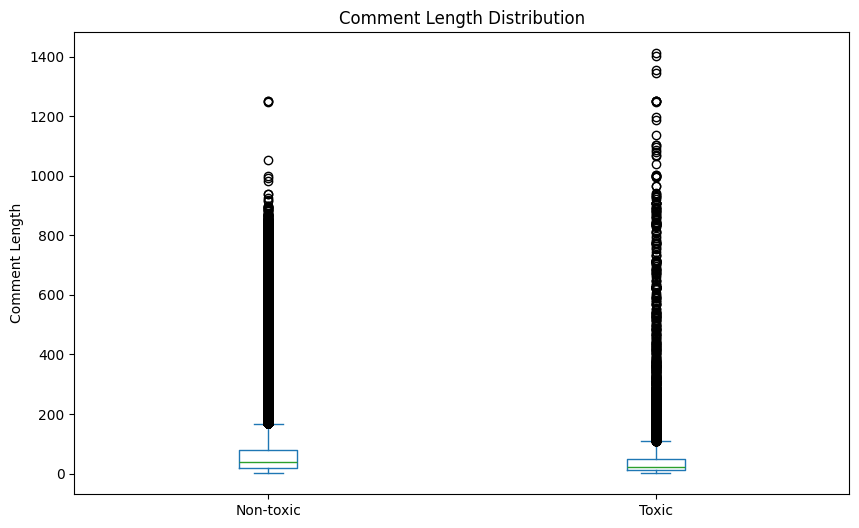

In [ ]:
box_plot_comment(df_train, show_quantile=False, show_outliers=True)

As previously guessed from the summary, we have many outliers. Let's try looking at the boxplot without outliers to make the differences clearer.

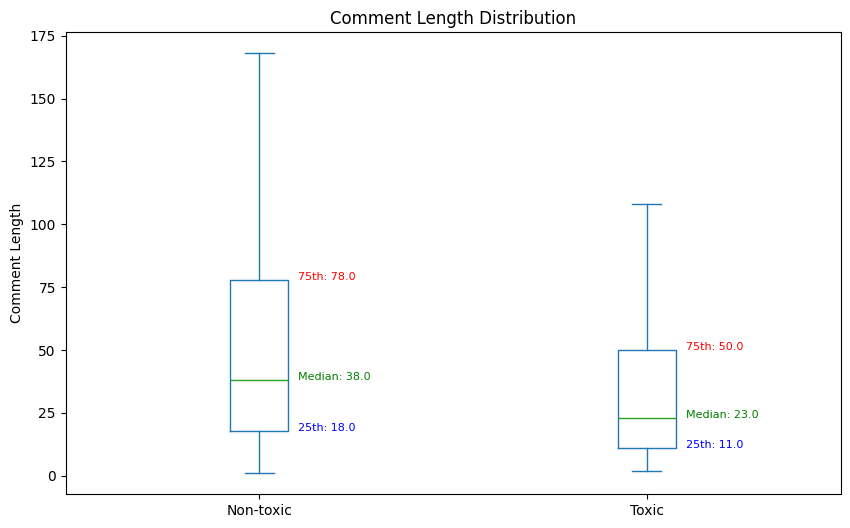

In [ ]:
box_plot_comment(df_train, show_quantile=True, show_outliers=False)

Toxic comments contain fewer words on median than non-toxic comments. This information will be useful later on when choosing the hyperparameters of the model.

Below is the histogram of the most common words for toxic and non-toxic comments.

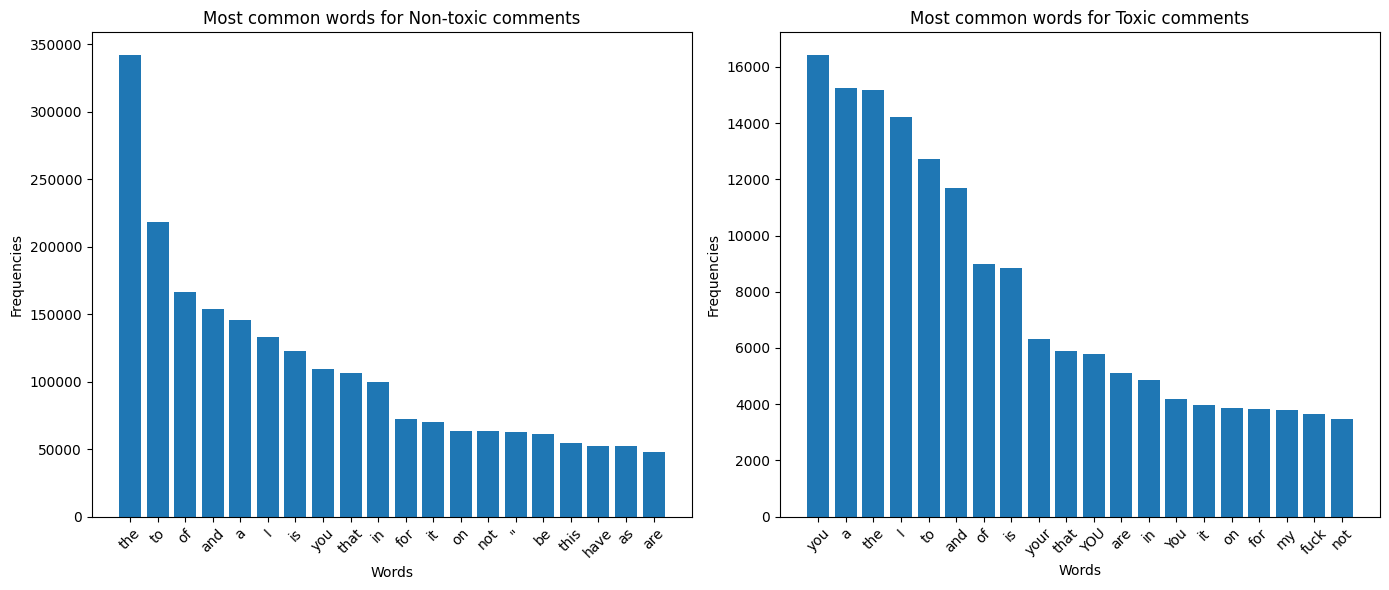

In [ ]:
plot_word_frequency(df_train, n=20, most_common=True)

What is noticeable? Even the same word in uppercase or uppercase, or single characters, are considered different. Single characters such as (") do not add meaning to the sentence or do not allow you to distinguish the difference between a toxic and non-toxic comment. We will see later how to handle them appropriately.



Let's look beyond the words used in a comment. Elements of writing style, such as punctuation, question usage, and capitalization, can provide additional clues about the tone or intent behind the message.
By analyzing these features, we can improve the detection of harmful content.

In [ ]:
df_train_feature_eng = df_train.copy()

df_train_feature_eng['exclamation_ratio'] = df_train_feature_eng["comment_text"].apply(lambda x: x.count('!') / len(x) if len(x) > 0 else 0)

df_train_feature_eng['question_ratio'] = df_train_feature_eng["comment_text"].apply(lambda x: x.count('?') / len(x) if len(x) > 0 else 0)

df_train_feature_eng['uppercase_ratio'] = df_train_feature_eng["comment_text"].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)

Now let's check if there are correlations between toxic comments and the new features.

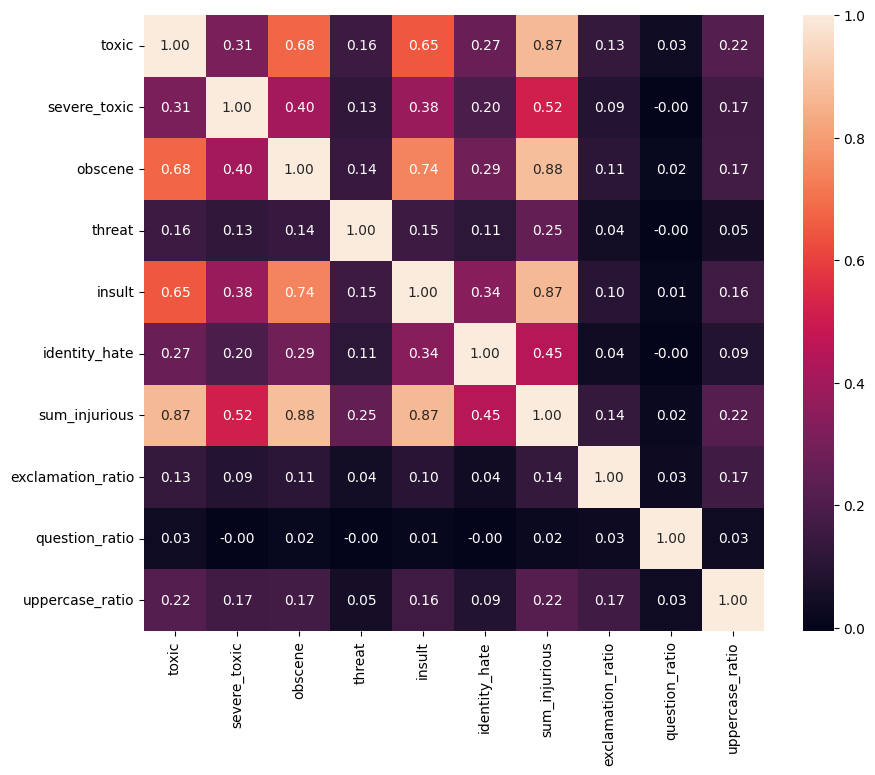

In [ ]:
correlation_matrix = (df_train_feature_eng.iloc[:, 1:]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()

- **Exclamation ratio**: A mild indicator of toxicity and insult, with some relevance to messages being considered injurious or harmful.
- **Question ratio**: It seems relatively neutral, showing little to no association with toxicity or insults, suggesting they don't strongly correlate with toxic content.
- **Uppercase ratio**: More strongly associated with toxic messages, indicating that shouting or using all caps may be a signal of more toxic behavior.

**Note**: I have tested various models, but adding these features has not brought significant improvements in any way. So for now they will not be included.

As for the EDA for the uncleaned dataset, we stop here. Below, a more in-depth EDA will be performed on the clean dataset, where we will try to reduce the noise present.

## Preprocessed Data EDA

In order to clean the data, TextCleaner class will be applied to the column containing the comments to try to remove some noise and components that do not add semantic value.
The following steps will be adopted:
- Converting into lowercase.
- If all words have only one letter, the text is modified by removing excessive spaces.
(example: h e l l o m y f r i e n d -> hello my friend)
- Removing consecutive repetitions of words.
(example: hi hi hi hi hi hi -> hi)
- Removing URLs, HTML tags, mentions (@username), hashtags (#hashtag), numbers and special characters.
- Removing repetitions in words with more than two letters repeated consecutively. These are reduced to two letters.
(example: helllllo -> hello)
- Removing common words using a list of NLTK stopwords (and adding stopwords after exploring the dataset).
- Words that contain only one character are removed.
(example: hi, h hello -> hi, hello)
- Extra spaces are removed.

**Note**: Due to the way TextCleaner class is designed, it is possible to apply the lemmatization, which is a linguistic process where words are reduced to their base or root form. But when I tested it, I noticed it transformed the word "ass" into "as", so the model identified the word "as" as a toxic word. For this reason, I decided not to use it.

For more details see the Utils section.

In [ ]:
custom_stop_words = {
    'would', 'no', 'one', 'like', 'just', 'they', 'dont', 'he', 'which', 'any', 'been', 'should',
    'we', 'more', 'some', 'other', 'who', 'here', 'also', 'his', 'think', 'because', 'know', 'how',
    'am', 'people', 'only', 'why', 'out', 'when', 'were', 'use', 'up', 'then', 'may', 'time',
    'them', 'being', 'their', 'now', 'than', 'get', 'utc', 'even', 'make', 'thanks', 'could',
    'does', 'well', 'want', 'such', 'way', 'these', 'first', 'pages', 'new', 'need', 'go', 'help',
    'say', 'thank', 'section', 'edits', 'look', 'read', 'image', 'take', 'still', 'two', 'over',
    'fact', 'him', 'back', 'right', 'youre', 'link', 'said', 'going', 'list', 'without', 'stop',
    'our', 'content', 'under', 'added', 'however', 'note', 'place', 'sure', 'case','wikipediacom',
    'seems', 'using', 'done', 'actually', 'better', 'ask', 'reason', 'wiki', 'wikipedia',
    'articles', 'hi', 'article', 'hello', 'im', 'talk', 'page', 'pages', 'wp', 'see', 'did',
    'please', 'user', 'edit','editing','add', 'editor', 'name', 'discussion', 'someone',
    'comment', 'question', 'source', 'year', 'month', 'day', 'information', 'deletion'
}
stop_words = set(stopwords.words('english'))
stop_words.update(custom_stop_words)

**Note**: In this part, I have incorporated a set of custom stop words plus the standard nltk English stop words, which were added after a (not shown) preliminar analysis. As a result, now we are doing the entire analysis from scratch taking these new stop words into account. This ensures that the data are re-evaluated with the most relevant terms filtered out, providing a more accurate and refined result.

In [ ]:
raw_df = df_train.copy()

cleaner = TextCleaner(lemming=False, stop_words=stop_words)
df_train = cleaner.transform(df_train)

Let's look at how a raw comment changes after applying the TextCleaner class.

In [ ]:
example = 2213
print(f"Raw comment:\n{raw_df['comment_text'].iloc[example]}\n")
print(f"Cleaned comment:\n{df_train['comment_text'].iloc[example]}")

Raw comment:
" November 2005 (UTC)

Sigh, if there is a dispute over whether the dispute is active then clearly there is a dispute. Also note proponents of ""conspiracy theory"" (aka propagandists) have so far refused to debate.  T 01:25, 24"

Cleaned comment:
november sigh dispute whether dispute active clearly dispute proponents conspiracy theory aka propagandists far refused debate


As can be seen, in the raw comment there are line breaks, letters, numbers or words in caps lock. All these things in this context do not add information, and as you can see in the cleaned comment part, they have been removed. These actions will allow the model to generalize better.

As mentioned before for the issue of duplicates, let's observe how they increase after applying the preprocessing class.

In [ ]:
Counter(df_train.duplicated())

Counter({False: 125008, True: 2648})

There is a slight increase in duplicates that will be removed using the DropUnwantedText class. Not only the duplicates are removed, but also the single characters and the rows with total character lenght equal to 2, since rows with just two letters are meaningless to our purpose.

In [ ]:
drop_unwanted_text = DropUnwantedText()
df_train = drop_unwanted_text.transform(df_train)

Now let's check in more detail how our dataset is distributed.

In [ ]:
print("Percentage of comments by type\n")
percentage_non_toxic_comment = (len(get_comment_lengths(df_train, "non_toxic"))/len(get_comment_lengths(df_train, "all")))*100
print(f"Non-toxic comments: {percentage_non_toxic_comment:.2f}%")
print(f"Toxic comments: {100-percentage_non_toxic_comment:.2f}%")

Percentage of comments by type

Non-toxic comments: 89.76%
Toxic comments: 10.24%


Non-toxic comments are in greater quantity than toxic comments, so we are in the case of an unbalanced dataset.

For the individual labels it results:

In [ ]:
print("Percentage of toxicity type considering only toxic comments:")
for i in df_train.columns[1:-1]:
  total_count =  len(get_comment_lengths(df_train, "toxic"))
  count_ones = df_train[i].value_counts().get(1, 0)
  percentage_ones = (count_ones / total_count)*100
  print(f"{i}: {count_ones} ({percentage_ones:.2f}%)")

Percentage of toxicity type considering only toxic comments:
toxic: 12077 (94.32%)
severe_toxic: 1252 (9.78%)
obscene: 6672 (52.11%)
threat: 381 (2.98%)
insult: 6223 (48.60%)
identity_hate: 1099 (8.58%)


We are in a case of multi-label classification, so the fact that the percentages added together are not 100% is perfectly normal. Almost all labels are classified as toxic, while in the cases of severe_toxic, threat and indentity_hate we have few comments. This could cause difficulties for the model since a lot of data is needed to be able to generalize and correctly predict the labels.

Let's check labels correlation.

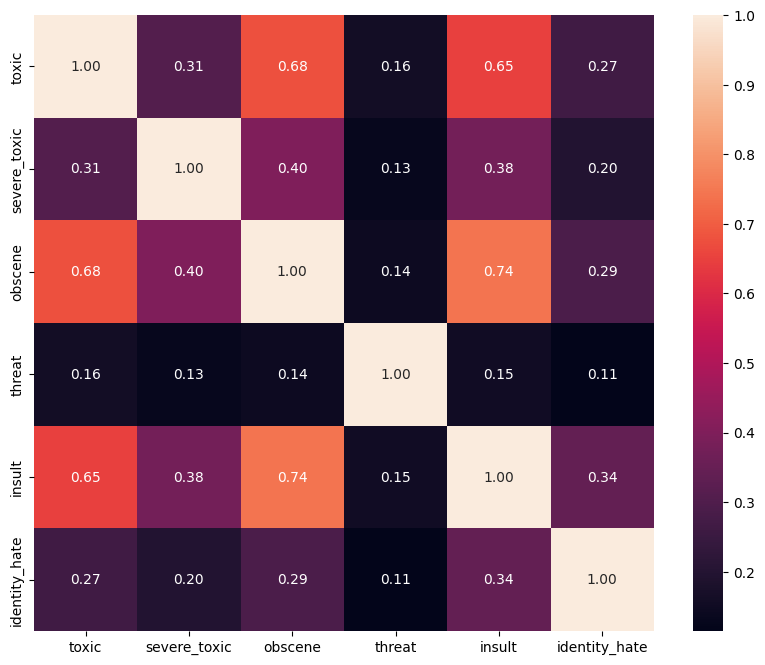

In [ ]:
correlation_matrix = (df_train.iloc[:, 1:-1]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()

- **Threat** label shows relatively low correlation with most other labels, indicating that the "threat" category seems independent compared to others like "toxic" or "insult".

- The correlations between **identity_hate** and the other categories are also on the lower end, suggesting that hate speech might occur in different contexts from toxic or obscene speech.

- Labels such as **toxic**, **obscene**, and **insult** tend to occur together in the same comments due to high correlation.

Now let's check how many word there are.

In [ ]:
all_words = ''.join(df_train["comment_text"]).split()
word_freq = Counter(all_words)
freq_count = Counter(word_freq.values())
freq_count_less_common = sum(value for _, value in sorted(freq_count.items())[:5])
print(f"Total words count: {len(word_freq)}\nWords with frequency equal or less than 5: {freq_count_less_common}")

Total words count: 253592
Words with frequency equal or less than 5: 223517


Words with low frequencies (≤ 5) might be less meaningful for classification, and they could introduce noise into the model.

This could introduce Out of Vocabulary (OOV) issues, which arise when a model encounters words that it has not seen during training. This is particularly problematic for models that rely on a predefined vocabulary, such as word embeddings. In this scenario, words that were not part of the training data or words with low frequency that might not appear in embeddings, are referred to as OOV.

Let's check the 25 most frequent words.

In [ ]:
common_words = word_freq.most_common(25)
print(f"Most commons words: {common_words}")

Most commons words: [('good', 9253), ('sources', 8407), ('made', 7270), ('many', 7171), ('fuck', 7099), ('used', 7029), ('much', 7005), ('find', 6762), ('really', 6692), ('since', 6662), ('deleted', 6586), ('work', 6473), ('point', 6381), ('something', 5565), ('history', 5212), ('editors', 5146), ('might', 4901), ('another', 4900), ('free', 4894), ('us', 4686), ('never', 4681), ('put', 4611), ('removed', 4583), ('feel', 4582), ('person', 4530)]


Below we will look at the words that distinguish toxic and non-toxic comments.

In [ ]:
non_toxic = "".join(df_train[df_train['sum_injurious'] == 0]['comment_text'])
toxic = "".join(df_train[df_train['sum_injurious'] >= 1]['comment_text'])

wordcloud_non_toxic = WordCloud(max_words=300, background_color='white').generate(non_toxic)
wordcloud_toxic = WordCloud(max_words=300, background_color='black').generate(toxic)

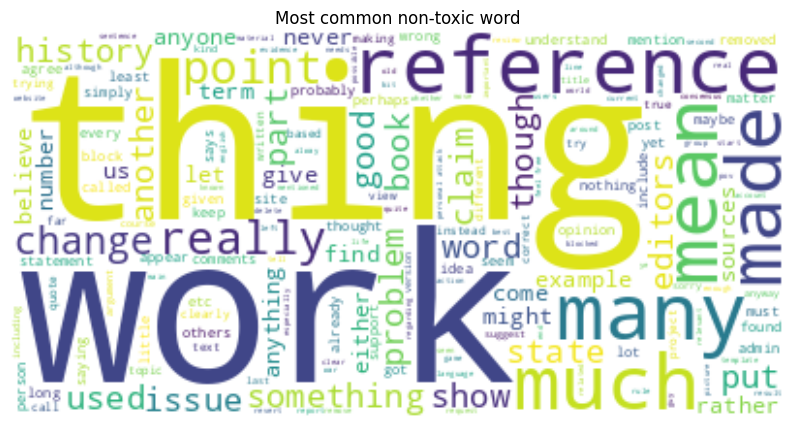

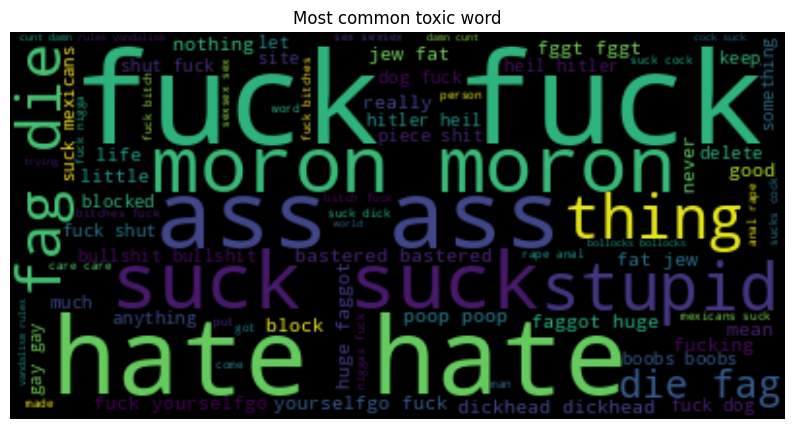

In [ ]:
# List of wordclouds and titles to iterate over
wordclouds = [(wordcloud_non_toxic, 'Most common non-toxic word'),
              (wordcloud_toxic, 'Most common toxic word')]

for wordcloud, title in wordclouds:
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


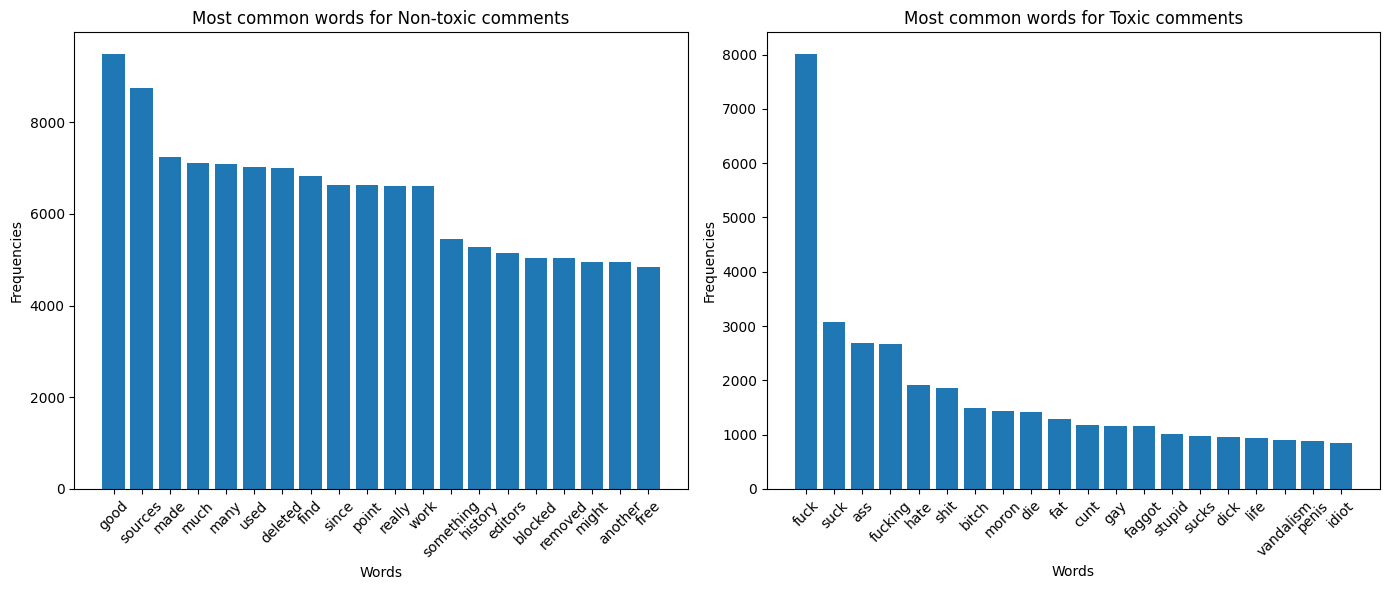

In [ ]:
plot_word_frequency(df_train, n=20, most_common=True)

Now we have more significant words than the version without cleaning, and there is a clear distinction between the most frequent words in the two types of comments.

How does the length of the comments change?

In [ ]:
# Calculates the number of words in each entry
pd.Series(df_train["comment_text"]).apply(lambda x: len(x.split(" "))).describe()

,comment_text
count,124982.000000
mean,27.572858
std,44.643586
min,1.000000
25%,7.000000
50%,14.000000
75%,30.000000
max,1250.000000


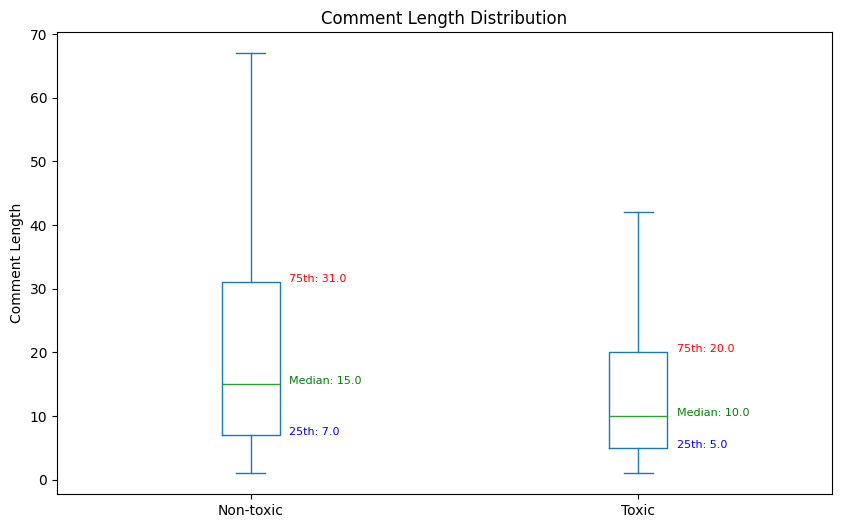

In [ ]:
box_plot_comment(df_train, show_quantile=True, show_outliers=False)

There is a decrease in the length of comments, due to the removal of duplicates and stop words.

In [ ]:
# Calculates the number of chars in each entry
pd.Series(df_train["comment_text"]).apply(lambda x: len(x)).describe()

,comment_text
count,124982.000000
mean,205.709198
std,333.703257
min,3.000000
25%,46.000000
50%,102.000000
75%,223.000000
max,5000.000000


We notice the same decrease in the number of characters due to the same previous reason.

With this, we concluded the EDA part.

# Benchmark Model

So far we have deduced the following starting points for the construction of the classification model, which are:
- The median length of toxic comments is 10, which we will keep in mind for embeddings.
- The dataset is unbalanced.
- There are about 250.000 unique words, many of which are infrequent.
- The median of the characters of the comments is about 100.

Taking into account this information, we begin to explore the part of the models, starting with the creation and cleaning of the train and the test set. After that, we will set a benchmark result.


In [ ]:
benchmark_preprocessor = PreprocessText(vectorizer=False,
                                        stop_words=stop_words)

X_train, y_train = benchmark_preprocessor.fit_transform(df_train)
X_test, y_test = benchmark_preprocessor.transform(df_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((124982,), (124982, 6), (31513,), (31513, 6))

**WARNING**: As previously pointed out, "sum_injurious" has been removed because this feature was created starting from some information we usually do not have available. So it has been removed to avoid data leakage.

X_train will have only "comment_text" as column, while y_train will have the 6 labels reported below.

In [ ]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

## Logistic Regression + TF-IDF

Let's start by saying that machine learning models cannot process text directly, so we need to convert raw text into numerical representations, making it possible for algorithms to understand and work with the data.

As a benchmark model we start with logistic regression and TF-IDF (Term Frequency - Inverse Document Frequency). This combination offers an effective solution for text classification, thanks to its ability to balance performance and speed.

Without going into too much detail, TF-IDF is a method for assessing the importance of a term within a document relative to a corpus of documents. Term Frequency (TF) measures the frequency of a term in a document, normalized by the total number of terms in the document. Inverse Document Frequency (IDF) measures how common or rare a term is in the corpus.

In [ ]:
# There are 250k words and 220k have less then 5 freq so the diffrence 30k was choosen
tfidf = TfidfVectorizer(max_features=30000)

tfidf_vectorized_train_texts = tfidf.fit_transform(X_train)
tfidf_vectorized_test_texts = tfidf.transform(X_test)

logistic = LogisticRegression(class_weight="balanced", random_state=0)

# ClassifierChain in order to manage the multilabels output
classifier_chain = ClassifierChain(base_estimator=logistic, random_state=0)

classifier_chain.fit(tfidf_vectorized_train_texts, y_train)

ClassifierChain(base_estimator=LogisticRegression(class_weight='balanced',
                                                  random_state=0),
                random_state=0)

Now that the fit is complete, let's check how the various labels were predicted.

We will prioritizing recall, since it helps ensure that the model remains effective in identifying harmful content, thereby contributing to a safer and more respectful environment.

In [ ]:
predictions_proba = classifier_chain.predict_proba(tfidf_vectorized_test_texts)

threshold = 0.6
predicted_labels = (predictions_proba > threshold).astype(int)

# Evaluate the model on test data
print("Classification Report for all labels:")
print(classification_report(y_test, predicted_labels, target_names=labels))

Classification Report for all labels:
               precision    recall  f1-score   support

        toxic       0.73      0.80      0.76      3089
 severe_toxic       0.24      0.89      0.38       328
      obscene       0.51      0.93      0.65      1688
       threat       0.14      0.81      0.24        91
       insult       0.40      0.92      0.56      1589
identity_hate       0.10      0.89      0.19       296

    micro avg       0.42      0.87      0.57      7081
    macro avg       0.35      0.87      0.46      7081
 weighted avg       0.54      0.87      0.64      7081
  samples avg       0.05      0.08      0.06      7081



The model can achieve good recall performance but struggles in balancing precision across different labels, particularly those less frequent in the dataset as we anticipated before. Now let's check how deep learning based model manage this issues.





# Deep Learning


In deep learning, TF-IDF is less effective because it is static, high-dimensional, and lacks contextual adaptation during model training. TextVectorization is preferred as it offers learnable embeddings that capture semantic relationships, adapt to context, and efficiently handle large vocabularies. It converts raw text into integer-encoded sequences, making it more suitable for machine learning models, especially those dealing with sequential data.

In [ ]:
vocabulary_size = 30000 # top 30k words
max_sequence_length = 40 # max text sequence length

Using all 250.000 words would create a sparse and inefficient representation, especially for rare terms with little impact. A vocabulary size of 30.000 balances efficiency and relevance by focusing on the most frequent words, ensuring the model captures important information while ignoring less impactful terms.

Another key consideration is setting the output sequence length to 40, which ensures consistent input length for the model. Given that the median comment length is 10 words and the 75% quantile is around 20 words, this length captures enough information from both shorter and longer comments. Shorter comments are padded, while longer ones are truncated, allowing the model to process data efficiently without excessive padding or loss of information.

In [ ]:
preprocessor_pipeline = PreprocessText(vectorizer=True,
                                        stop_words=stop_words,
                                        vocabulary_size=vocabulary_size,
                                        output_sequence_length=max_sequence_length)

X_train_vectorized, y_train, _ = preprocessor_pipeline.fit_transform(df_train)
X_test_vectorized, y_test = preprocessor_pipeline.transform(df_test)

Now that we have integer-encoded sequences ready, we still have to manage the class imbalance, for logistic regression it is done automatically, while for deep learning models it must be calculated in order to give more importance to less represented labels. For details see Utils.

In [ ]:
class_weights = calculate_class_weights(y_train, labels)
print(class_weights)

{'toxic': {0: 0.5533601566861933, 1: 5.185143663843215}, 'severe_toxic': {0: 0.5050227682651633, 1: 50.27334943639291}, 'obscene': {0: 0.5281233876629253, 1: 9.389398496240602}, 'threat': {0: 0.5015301450625713, 1: 163.88320209973753}, 'insult': {0: 0.5261386138613862, 1: 10.06439393939394}, 'identity_hate': {0: 0.5044352525831913, 1: 56.86657559198543}}


For this last introductory part, let's define early stopping and learning rate scheduling. These techniques are used together to optimize model training by preventing overfitting, ensuring the model doesn't train for too long if it isn't improving and improving convergence.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, start_from_epoch=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

Now we will aim to train and evaluate a deep learning model for a multi-label classification task using various hyperparameter configurations. The process begins by defining a model architecture with only dense layers. After that, other architecture such as GRU, LSTM etc. will be tested. We experiment with different learning rates and batch sizes to assess their impact on model performance. The training process is monitored using precision and recall metrics.
The goal is to determine the best model configuration that generalizes well to the test data by evaluating multiple hyperparameter combinations and analyzing the results.

## Model Dense

The model starts with an Embedding layer that converts words into dense vectors, capturing their semantic meaning. This is followed by a GlobalAveragePooling1D layer, which reduces the dimensionality of the word embeddings into a fixed-length vector. The model then passes through several Dense layers with ReLU activations to learn complex patterns, and Dropout layers are added to prevent overfitting. A BatchNormalization layer follows to stabilize training and improve performance. Finally, a dense output layer with a sigmoid activation produces probabilities for each label since is a multi-label classification task.


**Note**: The embedding dimension is fixed at 32. This decision was made because testing all the various combinations with variable embeddings sizes would have taken too much time, given the limited computing resources.
After some testing of various embedding sizes, 32 provided the best trade-off between computational efficiency, overfitting and model performance.

In [ ]:
model_dense = Sequential([
    Embedding(vocabulary_size+1, 32),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(len(labels), activation='sigmoid')  # Sigmoid per il multi-label
])

The model is compiled with the Adam optimizer, which helps in adjusting the model weights during training.

The loss function is binary crossentropy, since we are working with multiple binary labels. In addition, the Precision and Recall metrics are used to evaluate the model performance in terms of classification quality. For further details see Utils.

      Lr  Batch  Train Precision  Train Recall  Test Precision  Test Recall
0  1e-03     32             0.83          0.70            0.81         0.58
1  1e-03     64             0.84          0.73            0.75         0.67
2  1e-03    128             0.84          0.74            0.78         0.65
3  1e-04     32             0.84          0.70            0.81         0.52
4  1e-04     64             0.83          0.70            0.81         0.59
5  1e-04    128             0.82          0.67            0.84         0.57
6  1e-05     32             0.78          0.56            0.84         0.50
7  1e-05     64             0.79          0.54            0.89         0.44
8  1e-05    128             0.73          0.46            0.88         0.46


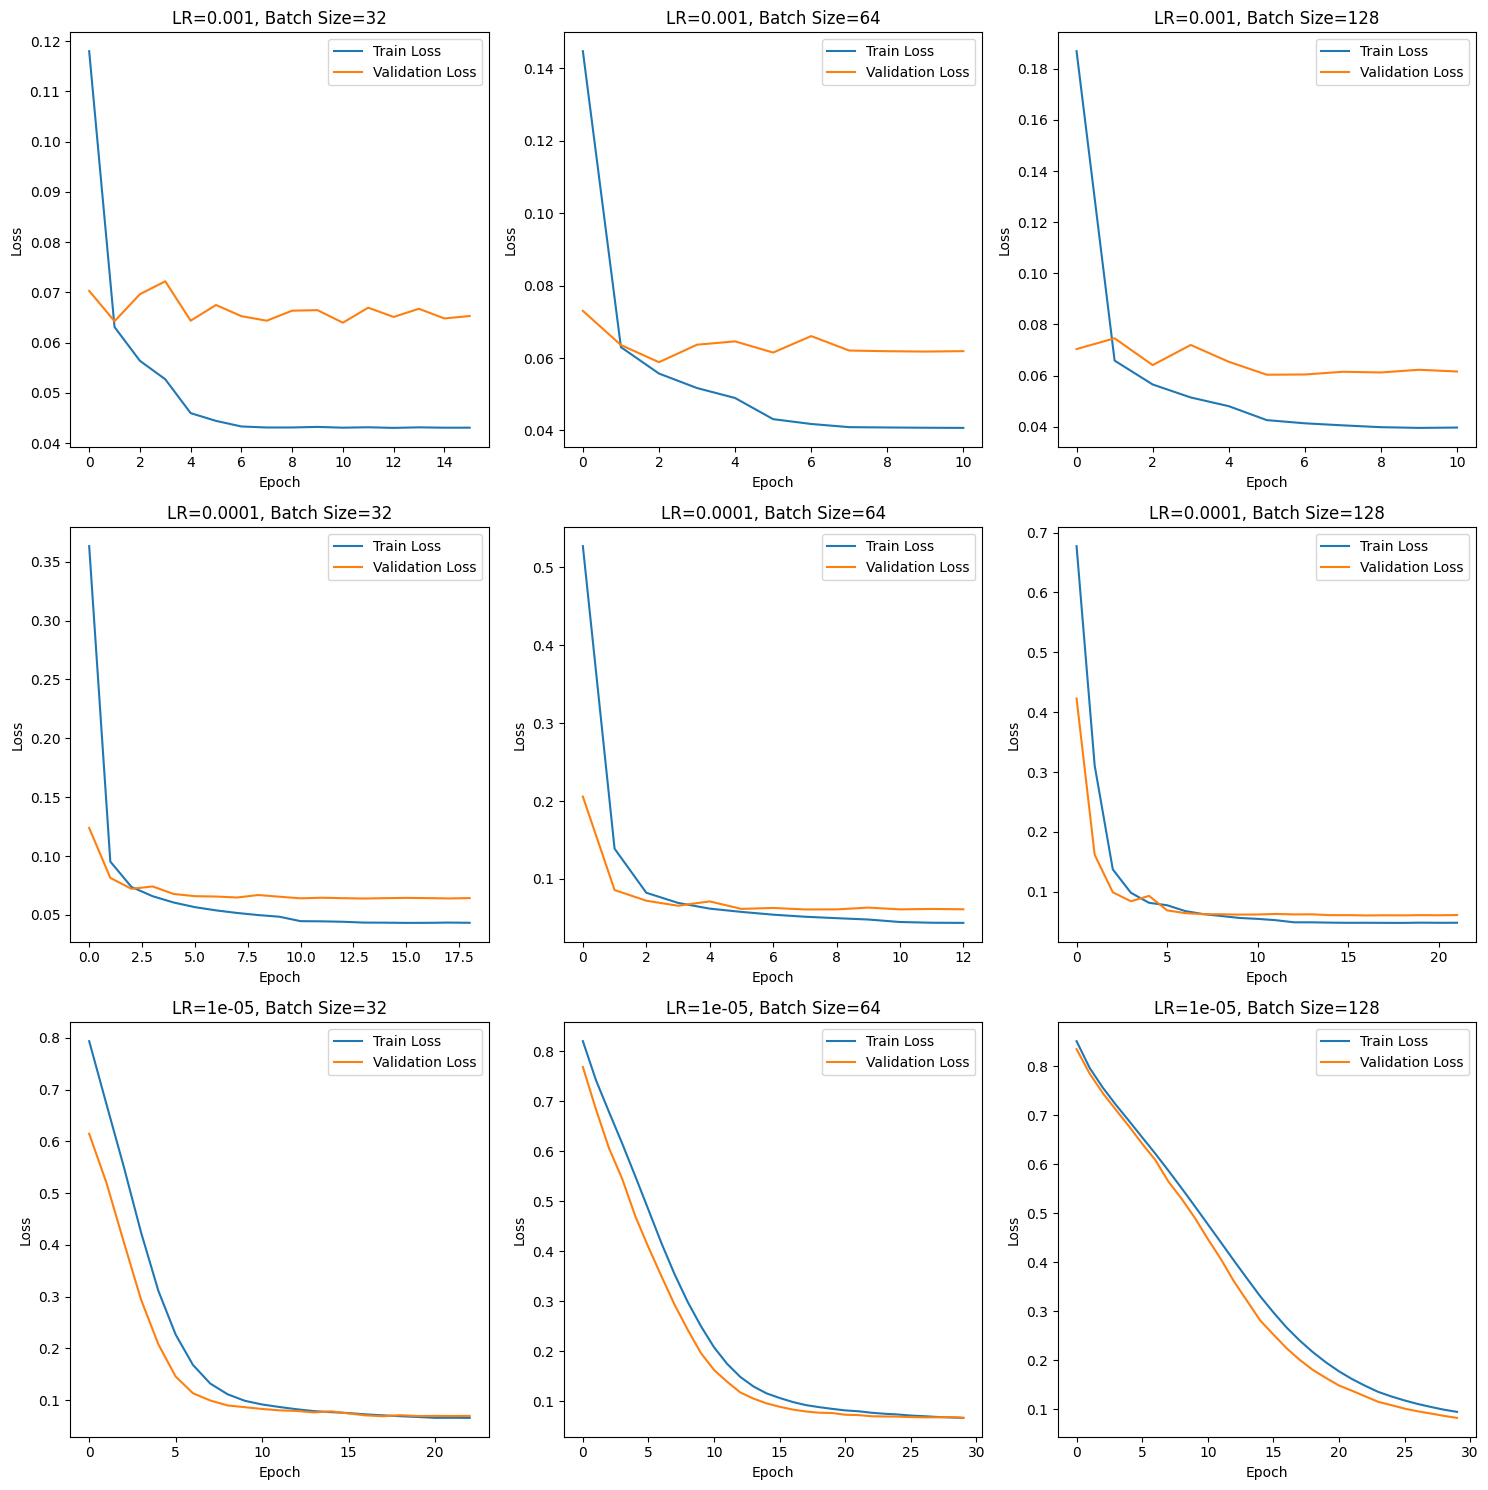

<Sequential name=sequential, built=True>

In [ ]:
dense_models_setting = ModelTrainer(model_dense,
                                    X_train_vectorized, y_train,
                                    X_test_vectorized, y_test,
                                    class_weights)

dense_models_setting.evaluate_model()

Observations from the Graphs:
1. **Learning Rate = 1e-3:**
   - **Trend:** Clear tendency towards overfitting.
   
2. **Learning Rate = 1e-4:**
   - **Trend:** Overfitting is present, but in a milder form.

3. **Learning Rate = 1e-5:**
   - **Trend:** Initially it shows underfitting, but the loss curves eventually align. No significant overfitting or underfitting, though the overall metrics are poorer.
   
Learning rate of 1e-4 and batch size of 64 seems the right compromise between results and overfitting. This combinations is chosen to analyze in more detail as follows.

In [ ]:
model_dense_setting = ModelTrainer(model_dense,
                                    X_train_vectorized, y_train,
                                    X_test_vectorized, y_test,
                                    class_weights,
                                    learning_rates=[1e-4], batch_sizes=[64])

      Lr  Batch  Train Precision  Train Recall  Test Precision  Test Recall
0  1e-04     64             0.83          0.69            0.85         0.56


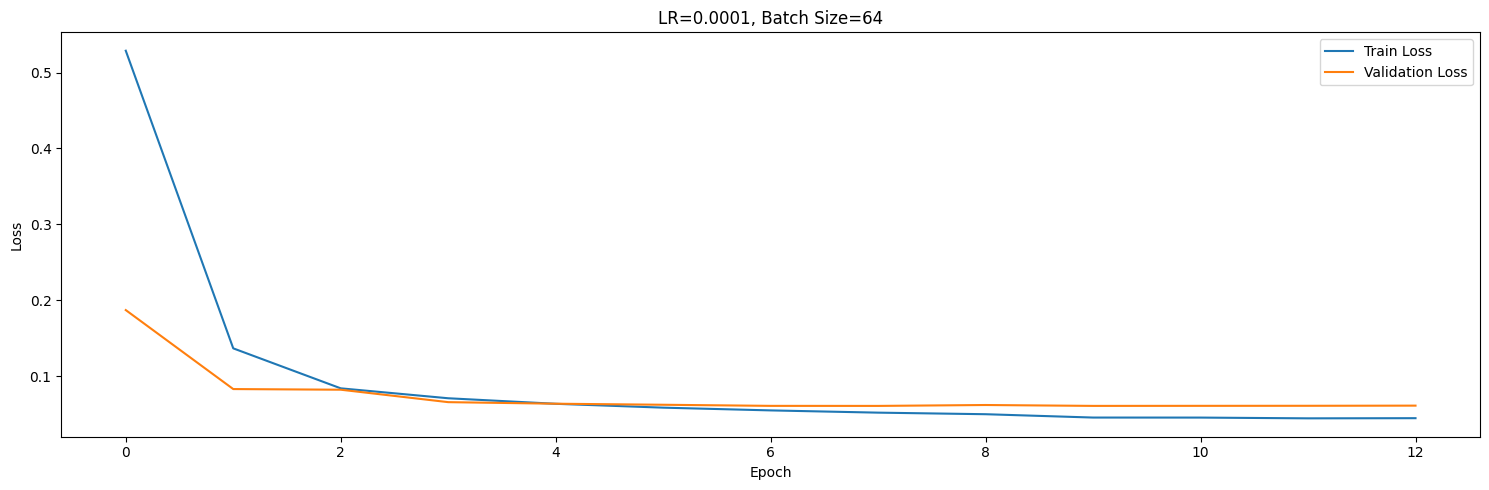

In [ ]:
best_model_dense = model_dense_setting.evaluate_model()

We obtian small differences in the metrics, which are expected due to the inherent randomness in training deep learning models. Now that's the model we want to test is ready, let's check the metrics for every labels.

Different thresholds are set for each label, because using a low universal threshold would unfairly penalize labels which are easier to predict. By tailoring the thresholds, we can improve the metrics for lables more difficult to predict, without compromising the performance on those that are more prevalent.

In [ ]:
# Custom thresholds for each label
thresholds_dense_model = {
  'toxic': 0.3,
  'severe_toxic': 0.01,
  'obscene': 0.1,
  'threat': 0.01,
  'insult': 0.1,
  'identity_hate': 0.05
}

probability_predictions(best_model_dense,
                        X_test_vectorized, y_test,
                        labels, thresholds_dense_model)

985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Classification Report for all labels:
               precision    recall  f1-score   support

        toxic       0.76      0.78      0.77      3084
 severe_toxic       0.12      0.98      0.22       326
      obscene       0.56      0.90      0.69      1685
       threat       0.03      0.71      0.06        91
       insult       0.49      0.88      0.63      1586
identity_hate       0.17      0.51      0.25       295

    micro avg       0.41      0.83      0.55      7067
    macro avg       0.35      0.79      0.44      7067
 weighted avg       0.59      0.83      0.66      7067
  samples avg       0.04      0.08      0.05      7067



The model performs well on common labels like "toxic", "insult" and "obscene", but struggles with rarer, more difficult classes like "threat" and "identity hate," likely due to insufficient or underrepresented data for these labels.

## Model GRU

Most of the consideration made before are still valid and only the differences will be reported. This time, the architecture includes an Embedding layer followed by a GRU (Gated Recurrent Unit) layer that is a type of recurrent neural network (RNN) designed to capture temporal dependencies in the data. It is a more efficient version of LSTM (Long Short-Term Memory network), and a better choice for simpler tasks or when computational resources are limited.

This time, pooling done as before is not necessary since the GRU layer inherently distills information across the sequence as it processes each word.

Another difference is the add of SpatialDropout1D is applied after the embedding layer to drop entire word vectors, preventing overfitting by reducing reliance on specific tokens in the sequence. By alternating these two dropout types, SpatialDropout1D regularizes at the sequence level, while Dropout regularizes at the unit level, improving the model's ability to generalize.

In [ ]:
model_gru = Sequential([
    Embedding(vocabulary_size+1, 32),
    SpatialDropout1D(0.3),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    GRU(64, return_sequences=False),
    Dropout(0.2),
    BatchNormalization(),
    Dense(len(labels), activation='sigmoid')  # Sigmoid per il multi-label
])

      Lr  Batch  Train Precision  Train Recall  Test Precision  Test Recall
0  1e-03     32             0.85          0.77            0.78         0.69
1  1e-03     64             0.85          0.79            0.77         0.70
2  1e-03    128             0.85          0.78            0.77         0.69
3  1e-04     32             0.82          0.70            0.79         0.68
4  1e-04     64             0.80          0.68            0.75         0.72
5  1e-04    128             0.80          0.69            0.76         0.70
6  1e-05     32             0.78          0.63            0.79         0.66
7  1e-05     64             0.78          0.62            0.78         0.67
8  1e-05    128             0.74          0.50            0.77         0.60


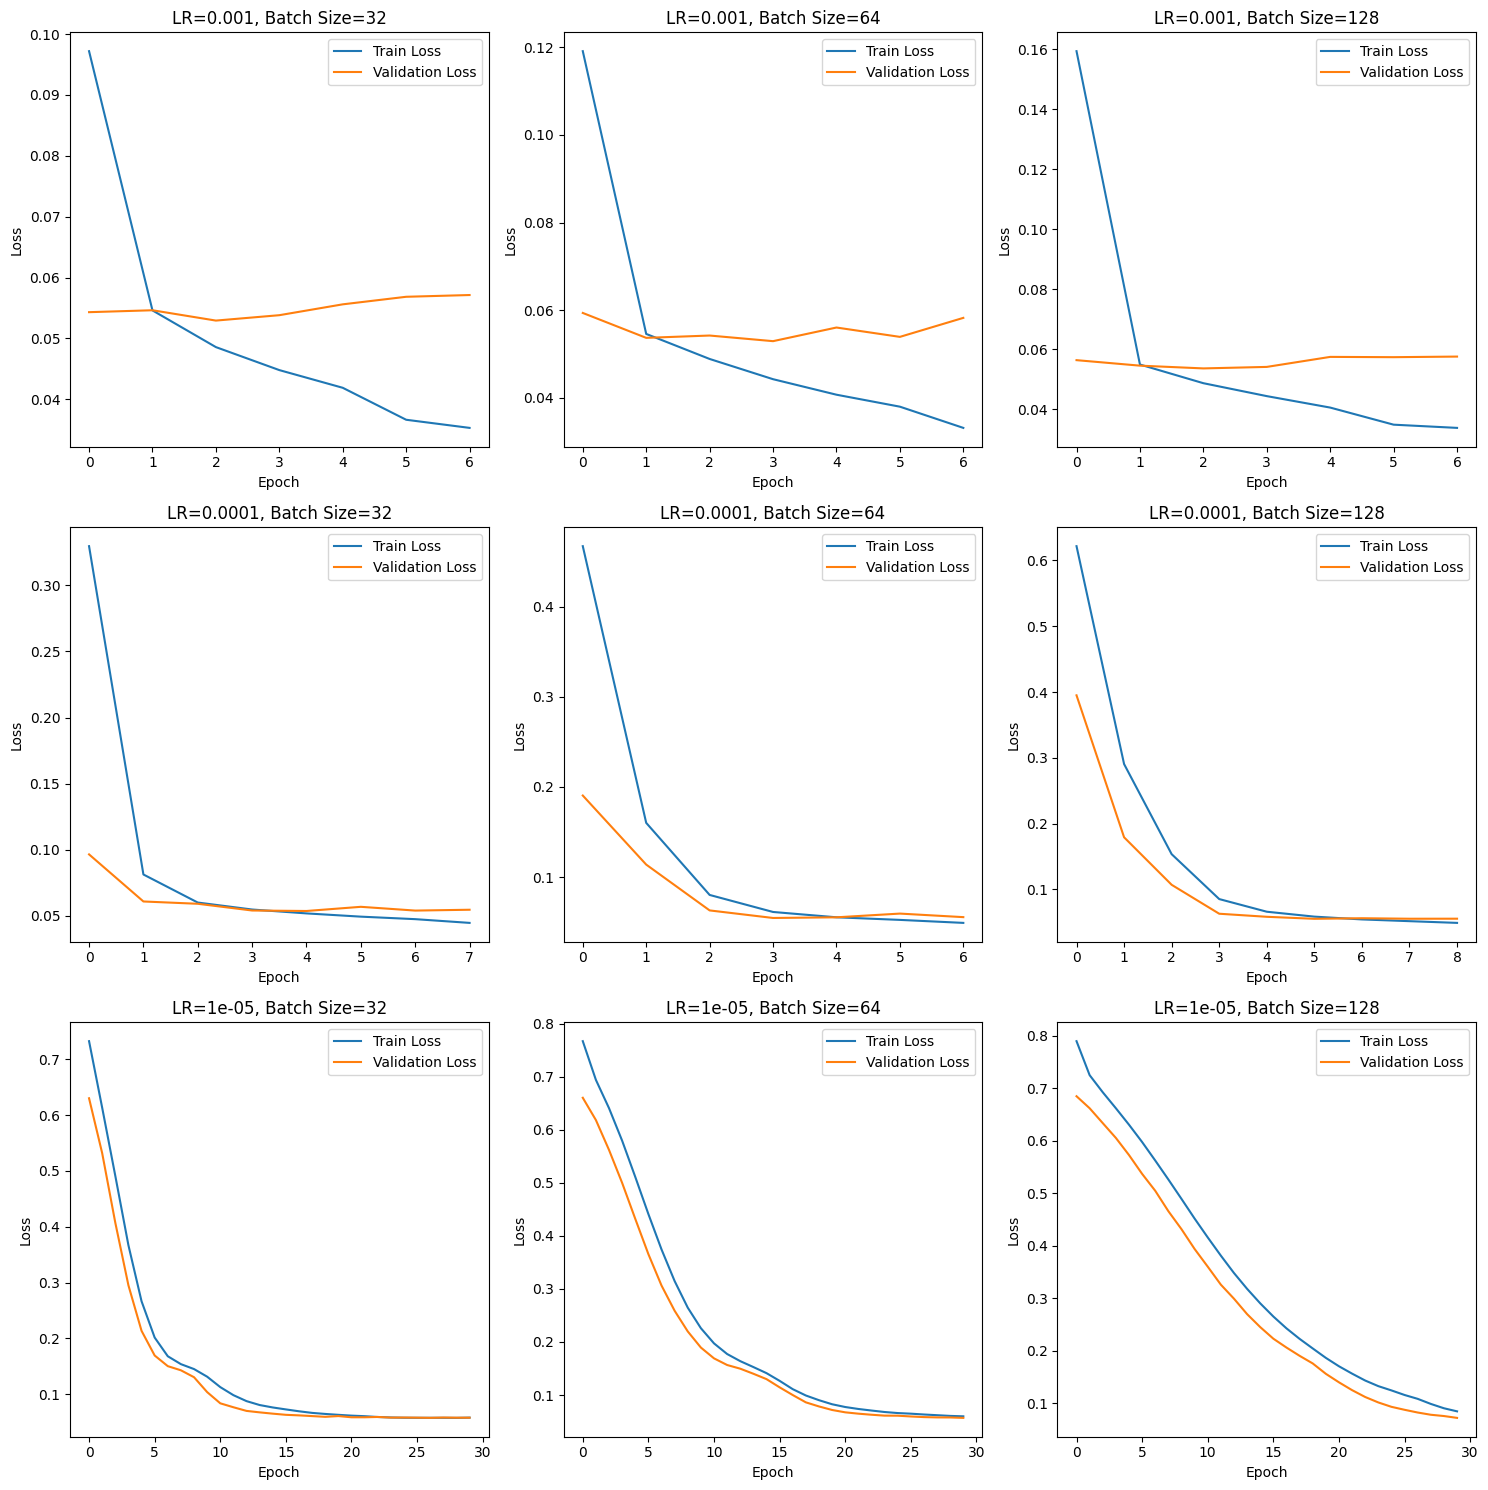

In [ ]:
model_gru_setting = ModelTrainer(model_gru,
                                  X_train_vectorized, y_train,
                                  X_test_vectorized, y_test,
                                  class_weights)

model_gru_setting.evaluate_model()

Observations from the graphs:
1. **Learning Rate = 1e-3:**
   - **Trend:** Clear tendency towards overfitting.
   
2. **Learning Rate = 1e-4:**
   - **Trend:** Overfitting is present, but in a milder form for batch size of 32.

3. **Learning Rate = 1e-5:**
   - **Trend:** Slight underfitting across all epochs.
   
The combination chosen to analyze in more detail are learning rate 1e-4 and batch size 64, because it seems the right compromise between results and overfitting. The combination learning rate 1e-4 and batch size 128 has similar results, but the first combination was chosen for achieve higher recall.

      Lr  Batch  Train Precision  Train Recall  Test Precision  Test Recall
0  1e-04     64             0.81          0.69            0.72         0.73


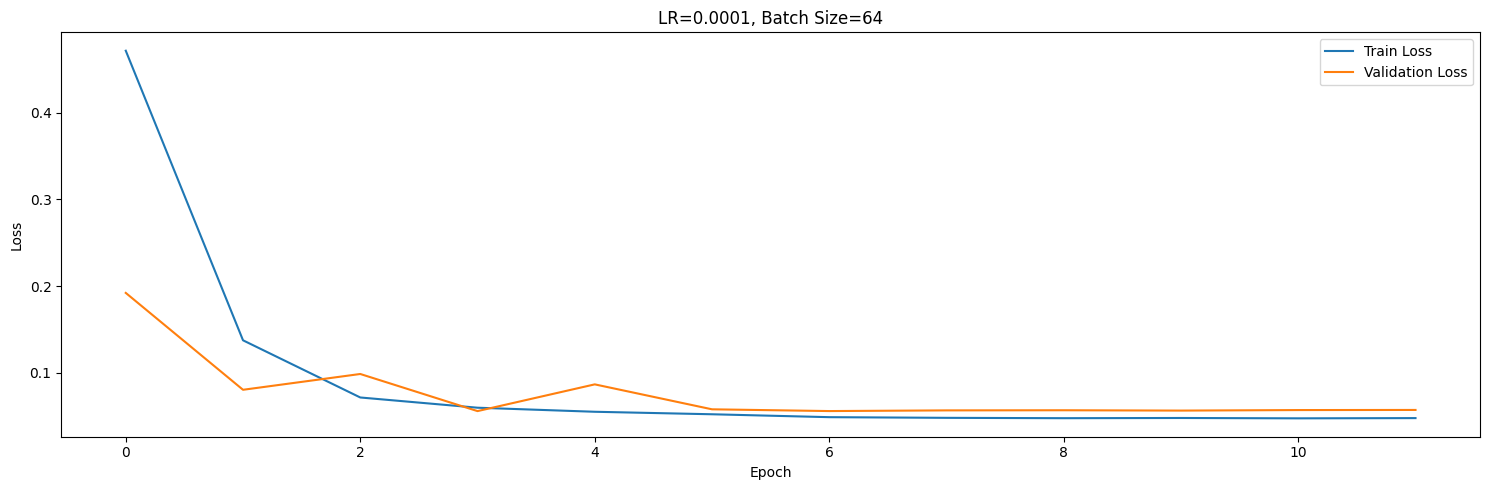

In [ ]:
model_gru_setting = ModelTrainer(model_gru,
                                  X_train_vectorized, y_train,
                                  X_test_vectorized, y_test,
                                  class_weights,
                                  learning_rates=[1e-4], batch_sizes=[64])

best_model_gru = model_gru_setting.evaluate_model()

We obtain small differences in the metrics, but these are expected due to the inherent randomness in training deep learning models. Now let's calculate the metrics using custom thresholds, as we have done before.

In [ ]:
# Custom thresholds for each label
thresholds_gru_model = {
    'toxic': 0.3,
    'severe_toxic': 0.05,
    'obscene': 0.1,
    'threat': 0.05,
    'insult': 0.2,
    'identity_hate': 0.05
}

probability_predictions(best_model_gru, X_test_vectorized, y_test, labels, thresholds_gru_model)

985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Classification Report for all labels:
               precision    recall  f1-score   support

        toxic       0.74      0.81      0.77      3084
 severe_toxic       0.19      0.97      0.32       326
      obscene       0.53      0.92      0.68      1685
       threat       0.05      0.38      0.08        91
       insult       0.54      0.86      0.67      1586
identity_hate       0.12      0.67      0.21       295

    micro avg       0.47      0.85      0.60      7067
    macro avg       0.36      0.77      0.46      7067
 weighted avg       0.59      0.85      0.67      7067
  samples avg       0.05      0.08      0.06      7067



The model performs a little better than the dense model on common labels but still struggles with classes like "threat" and "identity hate," for the same reason as before.

## Model LSTM

The previous consideration are still valid and the architecture is the same, the only thing that changes is the use of LSTM layers. LSTMs are more complex and offer more fine-grained control over memory, making them suitable for tasks requiring detailed long-term memory.

In [ ]:
model_lstm = Sequential([
    Embedding(vocabulary_size+1, 32),
    SpatialDropout1D(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    BatchNormalization(),
    Dense(len(labels), activation='sigmoid')  # Sigmoid per il multi-label
])

      Lr  Batch  Train Precision  Train Recall  Test Precision  Test Recall
0  1e-03     32             0.84          0.75            0.78         0.68
1  1e-03     64             0.85          0.75            0.79         0.67
2  1e-03    128             0.85          0.76            0.77         0.68
3  1e-04     32             0.83          0.71            0.80         0.66
4  1e-04     64             0.83          0.70            0.79         0.68
5  1e-04    128             0.84          0.73            0.79         0.66
6  1e-05     32             0.81          0.63            0.81         0.62
7  1e-05     64             0.80          0.63            0.79         0.64
8  1e-05    128             0.78          0.60            0.80         0.61


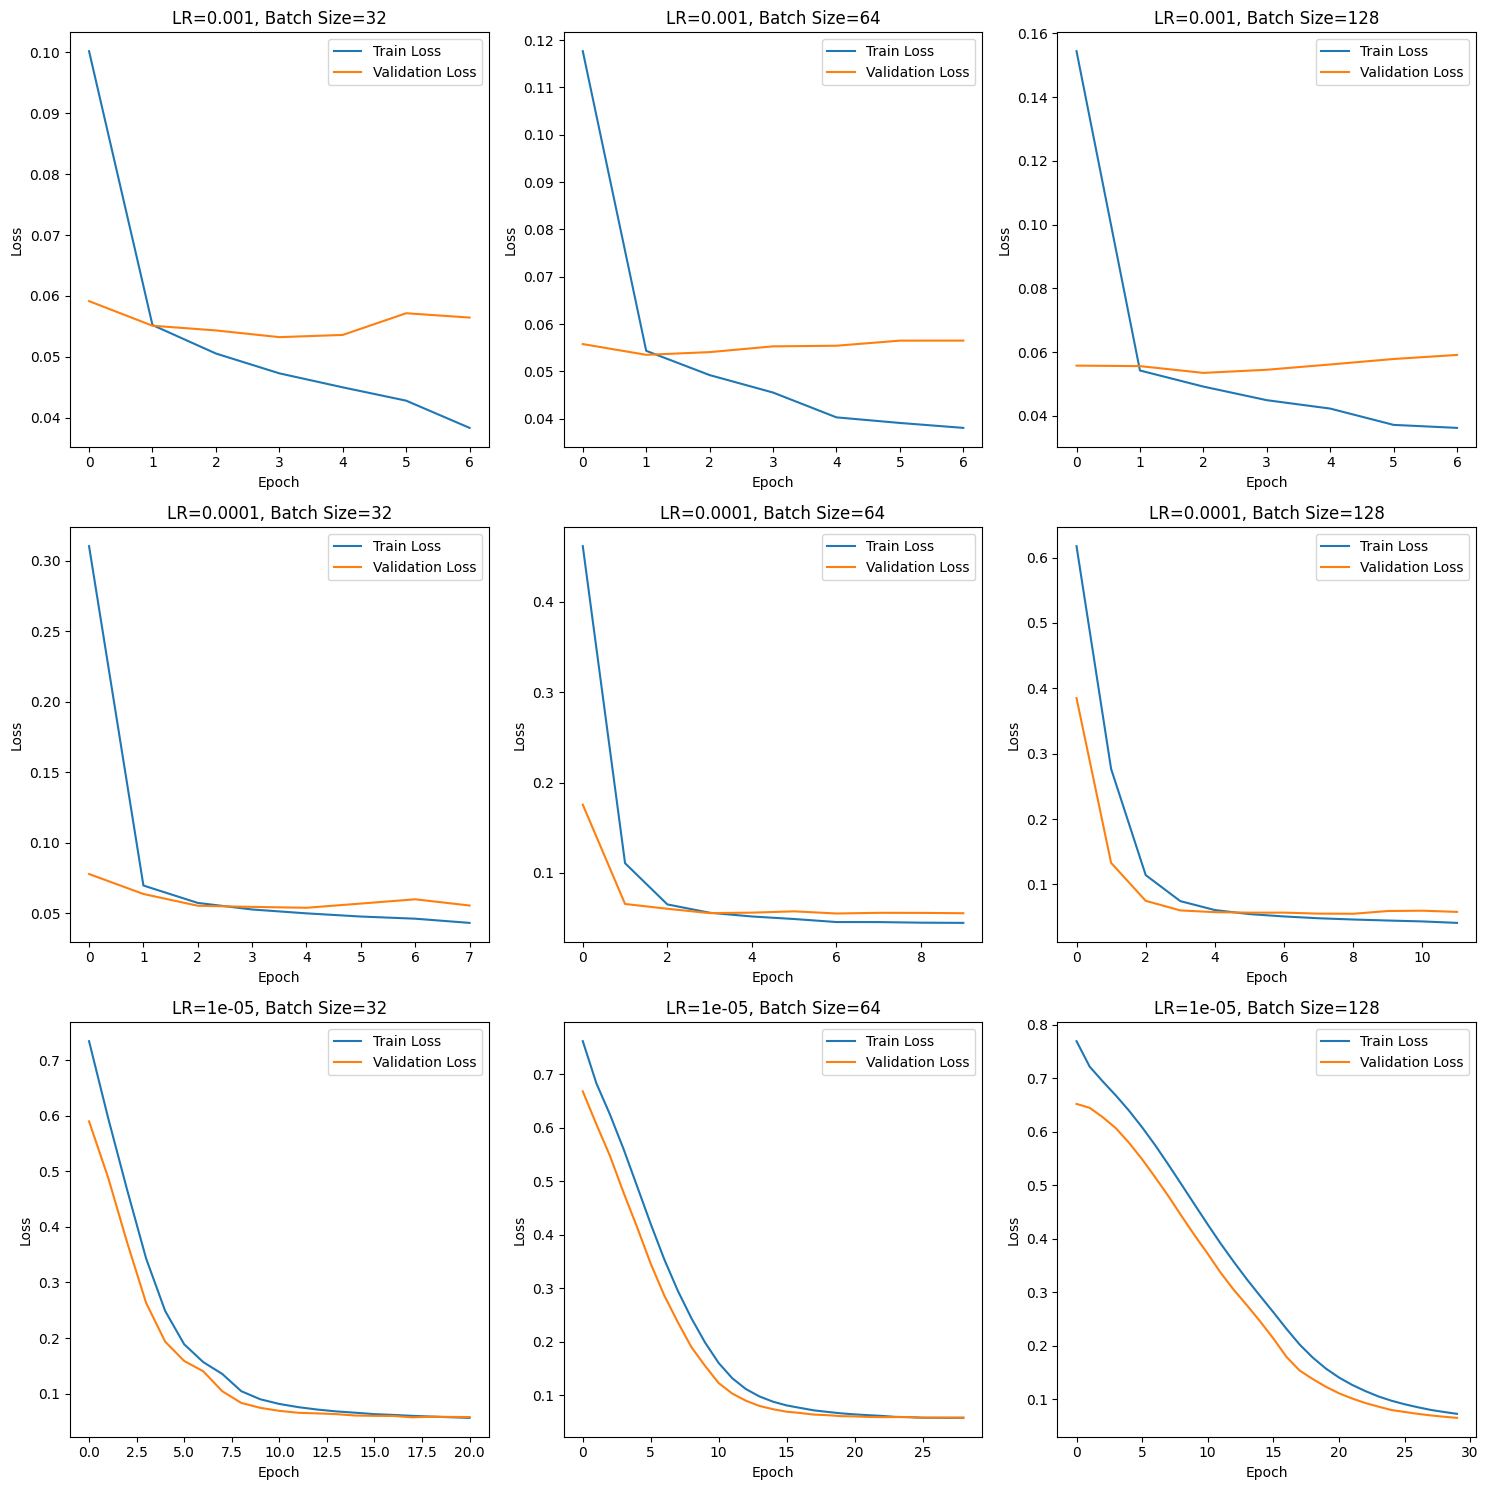

In [ ]:
model_lstm_setting = ModelTrainer(model_lstm,
                                  X_train_vectorized, y_train,
                                  X_test_vectorized, y_test,
                                  class_weights)

model_lstm_setting.evaluate_model()

Observations from the graphs:
1. **Learning Rate = 1e-3:**
   - **Trend:** Clear tendency towards overfitting.
   
2. **Learning Rate = 1e-4:**
   - **Trend:** Overfitting is present, but in a milder form for batch size of 32.

3. **Learning Rate = 1e-5:**
   - **Trend:** There is slight tendency of underfitting throughout the training for the batch size of 128, while for the others it seems to slowly vanish as the epochs pass.

So the choice to analyze in more detail will be the one with the combination lr 1e-05 and batch size of 64.
   

      Lr  Batch  Train Precision  Train Recall  Test Precision  Test Recall
0  1e-05     64             0.81          0.65             0.8         0.64


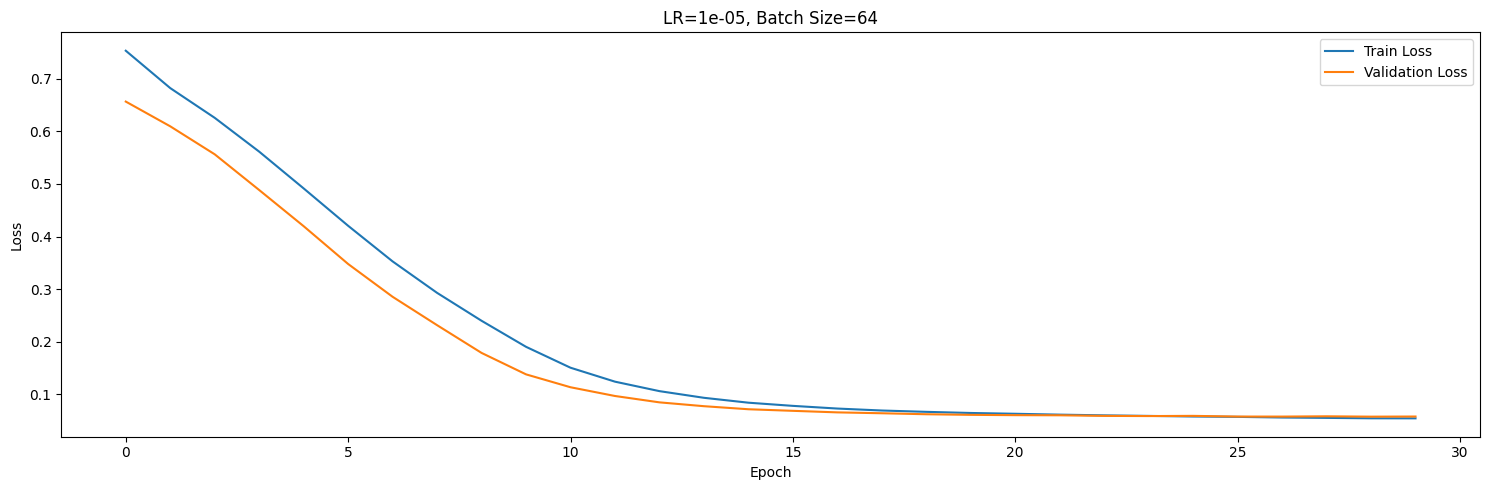

In [ ]:
model_lstm_setting = ModelTrainer(model_lstm,
                                  X_train_vectorized, y_train,
                                  X_test_vectorized, y_test,
                                  class_weights,
                                  learning_rates=[1e-5], batch_sizes=[64])

best_model_lstm = model_lstm_setting.evaluate_model()

We obtain small differences in the metrics, but these are expected due to the inherent randomness in training deep learning models. Now let's calculate the metrics using custom thresholds as we have done before.

In [ ]:
# Custom thresholds for each label
thresholds_lstm_model = {
    'toxic': 0.3,
    'severe_toxic': 0.05,
    'obscene': 0.1,
    'threat': 0.08,
    'insult': 0.1,
    'identity_hate': 0.05
}

probability_predictions(best_model_lstm, X_test_vectorized, y_test, labels, thresholds_lstm_model)

985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Classification Report for all labels:
               precision    recall  f1-score   support

        toxic       0.80      0.76      0.78      3084
 severe_toxic       0.20      0.91      0.33       326
      obscene       0.59      0.89      0.71      1685
       threat       0.07      0.27      0.11        91
       insult       0.51      0.86      0.64      1586
identity_hate       0.13      0.71      0.21       295

    micro avg       0.49      0.81      0.61      7067
    macro avg       0.38      0.73      0.46      7067
 weighted avg       0.62      0.81      0.68      7067
  samples avg       0.04      0.07      0.05      7067



There are no big differences in the metrics between GRU and LSTM model. The same problems are still presents.

Until now, result are not the best; maybe a word-level tokenization is not the most suitable for this problem, considering that any word not seen during training is considered Out-of-Vocabulary (OOV), and the model cannot directly handle such words during inference.

In order to play around this, let's try a differnt approach i.e. character-level tokenization that is more suitable when the task involves handling unseen words, misspellings, noisy text, or languages with complex morphology.

## Model with Character Level Tokenizer

This time, instead of using the maximum vocabulary as before, we will use only for this time the maximum number of letters of the alphabet: 26, plus 1 for the white space, for a total of 27.

In [ ]:
unique_char = 27  # Number of unique characters
max_char_length = 100  # Max number of characters in a sample

In [ ]:
pipeline = PreprocessText(vectorizer=True,
                          vocabulary_size=unique_char,
                          output_sequence_length=max_char_length,
                          token_level='character')

X_train_vectorized, y_train, _ = pipeline.fit_transform(df_train)
X_test_vectorized, y_test = pipeline.transform(df_test)

The previous considerations are still valid and the architecture is the same of GRU with the only difference of using a character-level tokenization.

In [ ]:
model_char = Sequential([
    Embedding(unique_char+1, 32, input_length=max_char_length),  # Character-level embedding
    SpatialDropout1D(0.3),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    GRU(64, return_sequences=False),
    Dropout(0.2),
    BatchNormalization(),
    Dense(len(labels), activation='sigmoid')  # Sigmoid per il multi-label
])

Various combinations will not be tested as before, because this time is more computationally expensive, so for now the best combination is given by the following set up.

      Lr  Batch  Train Precision  Train Recall  Test Precision  Test Recall
0  5e-04     64             0.83          0.63            0.79         0.66


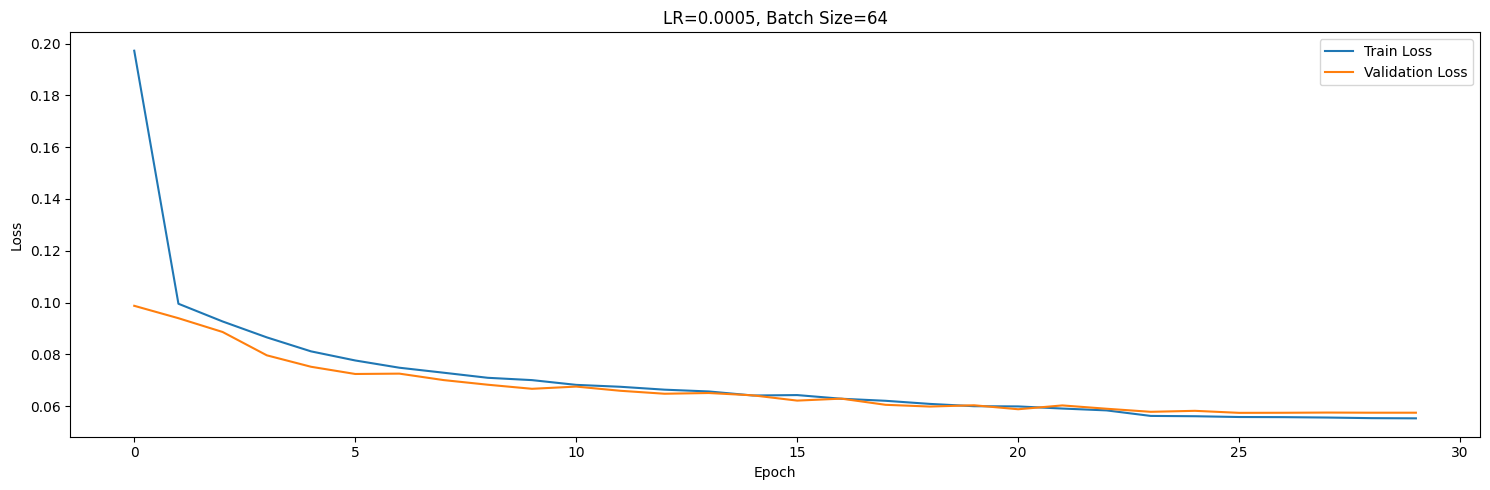

In [ ]:
model_char_setting = ModelTrainer(model_char,
                                  X_train_vectorized, y_train,
                                  X_test_vectorized, y_test,
                                  class_weights,
                                  learning_rates=[5e-4], batch_sizes=[64])

best_model_char = model_char_setting.evaluate_model()

In [ ]:
# custom thresholds for each label
thresholds_model_char = {
    'toxic': 0.3,
    'severe_toxic': 0.1,
    'obscene': 0.1,
    'threat': 0.08,
    'insult': 0.1,
    'identity_hate': 0.1
}

probability_predictions(best_model_char,
                        X_test_vectorized, y_test,
                        labels, thresholds_model_char)

985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
Classification Report for all labels:
               precision    recall  f1-score   support

        toxic       0.78      0.75      0.76      3084
 severe_toxic       0.30      0.83      0.44       326
      obscene       0.58      0.88      0.70      1685
       threat       0.11      0.31      0.17        91
       insult       0.49      0.86      0.62      1586
identity_hate       0.28      0.62      0.39       295

    micro avg       0.56      0.80      0.66      7067
    macro avg       0.42      0.71      0.51      7067
 weighted avg       0.62      0.80      0.68      7067
  samples avg       0.05      0.07      0.06      7067



There seems to be no evidence of underfitting, but there is a slight tendency of overfitting towards the end. Again, looking at the metrics, there are no significant improvements.

# Progress Update and Reflections

Until now we notice that Logistic Regression with TF-IDF outperformed all deep learning models, because TF-IDF provides good features for traditional models, making them highly effective in capturing important signals, especially for imbalanced classes.

Deep learning models like GRU or LSTM are more powerful for tasks that involve long-term dependencies in sequences (e.g. for large, complex datasets). However, for simple text classification tasks with smaller datasets and limited sequence-level context, these models can be unnecessarily complex, leading to inefficiency and poor generalization.

Since more data are not avaiable, another solution could be text augmentation, which helps by increasing the diversity and size of the training data, improving generalization, and addressing class imbalance. Let's see in the next session after text augmentation if there will be improvement.

# Data Augmentation

As seen, some labels have significantly fewer examples, leading to poor performance on those labels. To address this, we propose using back translation and synonym augmentation specifically for the less frequent labels. This method involves translating text to another language and then back to the original language, generating semantically similar variations that can help enrich the underrepresented classes. Since back translation take too much time, the focusing augmentation efforts are only on the labels with fewer instances.

Now let's filter only the labels of interest.

In [ ]:
filtered_df_train = df_train[(df_train['severe_toxic'] == 1) | (df_train['threat'] == 1) | (df_train['identity_hate'] == 1)]
len(filtered_df_train)

2376

## Back Translation

Since the back translation process is very time consuming, the filtered_df dataset is splitted into batch sizes of 50. This helps speed up the process (it still took several hours and sometimes a small internet interruption was enough to stop the execution).

In [ ]:
num_rows = len(filtered_df_train)
batch_size = 50
all_batches_df = pd.DataFrame()

# Iterate over the entire DataFrame in chunks of batch_size rows
for start in range(0, num_rows, batch_size):
    end = min(start + batch_size, num_rows)  # Ensure not to exceed the limit
    batch_df = filtered_df_train.iloc[start:end]

    # Apply the translation function to the current batch
    df_aug = augment_dataset_with_translations(batch_df, ["it","es","jp","eo","el","hr","is","ko"])

    # Concatenate the results of the current batch to the accumulating DataFrame
    all_batches_df = pd.concat([all_batches_df, df_aug], ignore_index=True)


In [ ]:
all_batches_df.to_csv('augmented_data_merged.csv', index=False)

## Synonym Augmentation


Replace each word randomly with synonyms.

In [ ]:
# 50% probability of replacing words with synonyms
aug_synonym = naw.SynonymAug(aug_p=0.5)

# Apply augmentation to each comment text in X_train
filtered_df_train['comment_text'] = filtered_df_train['comment_text'].apply(lambda text: aug_synonym.augment(text))

Let's check how a text will change.

In [ ]:
print("Original Text:", df_train["comment_text"].loc[17315])
print("Augmented with Synonym:", filtered_df_train["comment_text"].loc[17315])

Original Text: fuck dumb motherfucking asshole dare son bitch fucking lock worthless asshole hate gut hell seen last continue harass piece shit evryday screw oregon bitch
Augmented with Synonym: ['fuck slow motherfucking asshole dare son bitch be intimate lock worthless asshole hatred catgut nether region get a line last continue harass man give away evryday screw oregon bitch']


Change like "dumb" to "slow" or "hell" to "nether region" will to increase the diversity and size of the training data.

In [ ]:
filtered_df_train.to_csv("augmented_texts_synonym.csv", index=False)

## Augmented Data Set Combined

In [ ]:
back_translation = pd.read_csv('augmented_data_merged.csv')
synonym = pd.read_csv('augmented_texts_synonym.csv')

augmented_df_train = pd.concat([df_train, back_translation, synonym], axis=0, ignore_index=True)

Now that the two sets with the augmented texts have been created, let's create the train set again on the augmented_df_train.

**WARNING**: It is important that the test set remains unchanged and that nothing from the augmented sets is added, otherwise data leakage would occur.

Let's look at how the percentages change.


In [ ]:
print("Percentage of comments by type\n")
percentage_non_toxic_comment = (len(get_comment_lengths(augmented_df_train, "non_toxic"))/len(get_comment_lengths(augmented_df_train, "all")))*100
print(f"Non toxic comments: {percentage_non_toxic_comment:.2f}%")
print(f"Toxic comments: {100-percentage_non_toxic_comment:.2f}%")

Percentage of comments by type

Non toxic comments: 72.37%
Toxic comments: 27.63%


We have almost tripled the toxic comments.
Let's look at the percentages of the individual labels.

In [ ]:
print("Percentage of toxicity type considering only toxic comments\n")
for i in augmented_df_train.columns[1:-1]:
  total_count =  len(get_comment_lengths(augmented_df_train, "toxic"))
  count_ones = augmented_df_train[i].value_counts().get(1, 0)
  percentage_ones = (count_ones / total_count)*100
  print(f"{i}: {count_ones} ({percentage_ones:.2f}%)")

Percentage of toxicity type considering only toxic comments

toxic: 41729 (95.25%)
severe_toxic: 17724 (40.46%)
obscene: 31555 (72.03%)
threat: 5418 (12.37%)
insult: 31087 (70.96%)
identity_hate: 15498 (35.38%)


# Deep Learning Model Augmented

Now let's test various models to see how the results change. The premises are the same as previously made.

In [ ]:
vocabulary_size = 30000 # top 30k words
max_sequence_length = 40

In [ ]:
pipeline = PreprocessText(vectorizer=True,
                          vocabulary_size=vocabulary_size,
                          output_sequence_length=max_sequence_length)

X_train_vectorized, y_train, tokenizer = pipeline.fit_transform(augmented_df_train)
X_test_vectorized, y_test = pipeline.transform(df_test)

**Note**: This time we save the tokenizer. Saving it ensures that the exact preprocessing steps used during training (including tokenization and vocabulary) are preserved and can be reused during inference, preventing discrepancies and errors.

In [ ]:
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [ ]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

Let's recalculate the weights, since the proportion are changed.

In [ ]:
class_weights = calculate_class_weights(y_train, labels)
print(class_weights)

{'toxic': {0: 0.6406420445691133, 1: 2.277562326869806}, 'severe_toxic': {0: 0.5460583117486884, 1: 5.927901946647441}, 'obscene': {0: 0.5966666397890645, 1: 3.086207615631647}, 'threat': {0: 0.5137251634939809, 1: 18.71471927162367}, 'insult': {0: 0.5945429126962446, 1: 3.144301861137078}, 'identity_hate': {0: 0.5409605965348344, 1: 6.603426735677315}}


## Model Deep Learning Augmented

The logic is the same. Since with the previous tests the GRU model was the one that gave the best results, we will test only this model.

In [ ]:
model_gru_aug = Sequential([
    Embedding(vocabulary_size+1, 32),
    SpatialDropout1D(0.3),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    GRU(64, return_sequences=False),
    Dropout(0.2),
    BatchNormalization(),
    Dense(len(labels), activation='sigmoid')  # Sigmoid per il multi-label
])

      Lr  Batch  Train Precision  Train Recall  Test Precision  Test Recall
0  1e-04     64             0.88          0.84            0.76         0.68


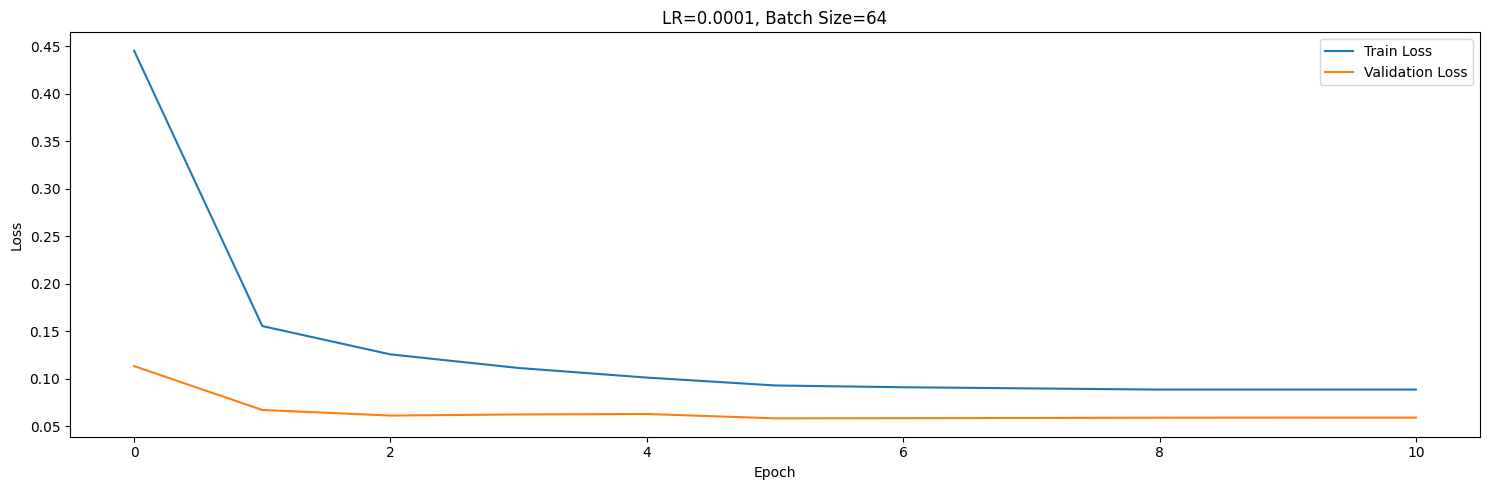

In [ ]:
model_gru_aug_setting = ModelTrainer(model_gru_aug,
                                      X_train_vectorized, y_train,
                                      X_test_vectorized, y_test,
                                      class_weights,
                                      learning_rates=[1e-4], batch_sizes=[64])

model_gru_aug = model_gru_aug_setting.evaluate_model()

It is observed throughout the training and validation loss is always lower than the training loss. The model may fail to generalize well on augmented data because during validation no augmentation is applied. The model sees the original, unaltered data, which can make it easier for the model to achieve lower loss because it's dealing with "ideal" version of the examples. However, the model will still be learning robust features and representations.

In [ ]:
# Custom thresholds for each label
thresholds_model_gru_aug = {
    'toxic': 0.4,
    'severe_toxic': 0.1,
    'obscene': 0.1,
    'threat': 0.05,
    'insult': 0.1,
    'identity_hate': 0.05
}

probability_predictions(model_gru_aug,
                        X_test_vectorized, y_test,
                        labels, thresholds_model_gru_aug)

995/995 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step
Classification Report for all labels:
               precision    recall  f1-score   support

        toxic       0.86      0.72      0.78      3097
 severe_toxic       0.26      0.78      0.39       329
      obscene       0.64      0.88      0.74      1696
       threat       0.08      0.65      0.14        91
       insult       0.53      0.85      0.65      1592
identity_hate       0.17      0.79      0.28       297

    micro avg       0.53      0.79      0.64      7102
    macro avg       0.42      0.78      0.50      7102
 weighted avg       0.67      0.79      0.70      7102
  samples avg       0.04      0.07      0.05      7102



We see a improvement in the metrics compared to before, but we still don't get satisfactory metrics. There is a clear improvemnt, thus data agmentation is working since until now these are the best result we have got.


Since the classical techniques seem not to be enough, let's try to use more complex solutions.

## Pre-Trainded Embeddings

Until now, we experimented with variants such as only Dense, GRU and LSTM, using custom word embeddings. However, the results were not the best, for the varius reason stated during the project.

Given these challenges, we now seek to evaluate the performance of pre-trained word embeddings, specifically GloVe and FastText, which have been shown to capture rich semantic relationships between words in a more generalized manner.

In this next phase of testing, we will focus on fine-tuning the architecture by integrating these embeddings into our model, and conduct a series of tests to determine whether GloVe or FastText can outperform our previous attempts with custom embeddings.

### Model FastText

Let's start with the necessary download.

In [ ]:
# Download FastText embeddings
fasttext_file_path = download_fasttext_embeddings()

# Load FastText embeddings
fasttext_embeddings = load_fasttext_embeddings(fasttext_file_path)

FastText embeddings downloaded to /content/cc.en.300.bin.gz
Loading FastText embeddings from /content/cc.en.300.bin.gz


Loaded 2000000 FastText embeddings.


Now we create an embedding matrix using pre-trained word embeddings, then this matrix will be used to initialize the embeddings for words in the neural network model.

In [ ]:
fasttext_embedding_matrix = create_embedding_matrix(tokenizer,
                                                    fasttext_embeddings,
                                                    num_words=vocabulary_size, embedding_dim=300)

Let's spend a few words about the next embedding layer. Since we have limited resources we opted to freeze the embeddings (trainable=False). This means the embeddings remain unchanged during training, allowing the model to rely on the pre-trained embeddings, while only training the other layers of the model. More consideration will be made next.

In [ ]:
model_fasttext = Sequential([
    Embedding(vocabulary_size, 300, weights=[fasttext_embedding_matrix], trainable=False, input_length=max_sequence_length),
    SpatialDropout1D(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    BatchNormalization(),
    Dense(len(labels), activation='sigmoid')  # Sigmoid per il multi-label
])

      Lr  Batch  Train Precision  Train Recall  Test Precision  Test Recall
0  1e-03     32             0.86          0.80            0.74         0.68
1  1e-03     64             0.87          0.81            0.76         0.67
2  1e-03    128             0.87          0.79            0.75         0.65
3  1e-04     32             0.84          0.69            0.75         0.58
4  1e-04     64             0.84          0.70            0.75         0.58
5  1e-04    128             0.84          0.70            0.76         0.57
6  1e-05     32             0.81          0.53            0.75         0.45
7  1e-05     64             0.81          0.49            0.76         0.41
8  1e-05    128             0.79          0.45            0.76         0.37


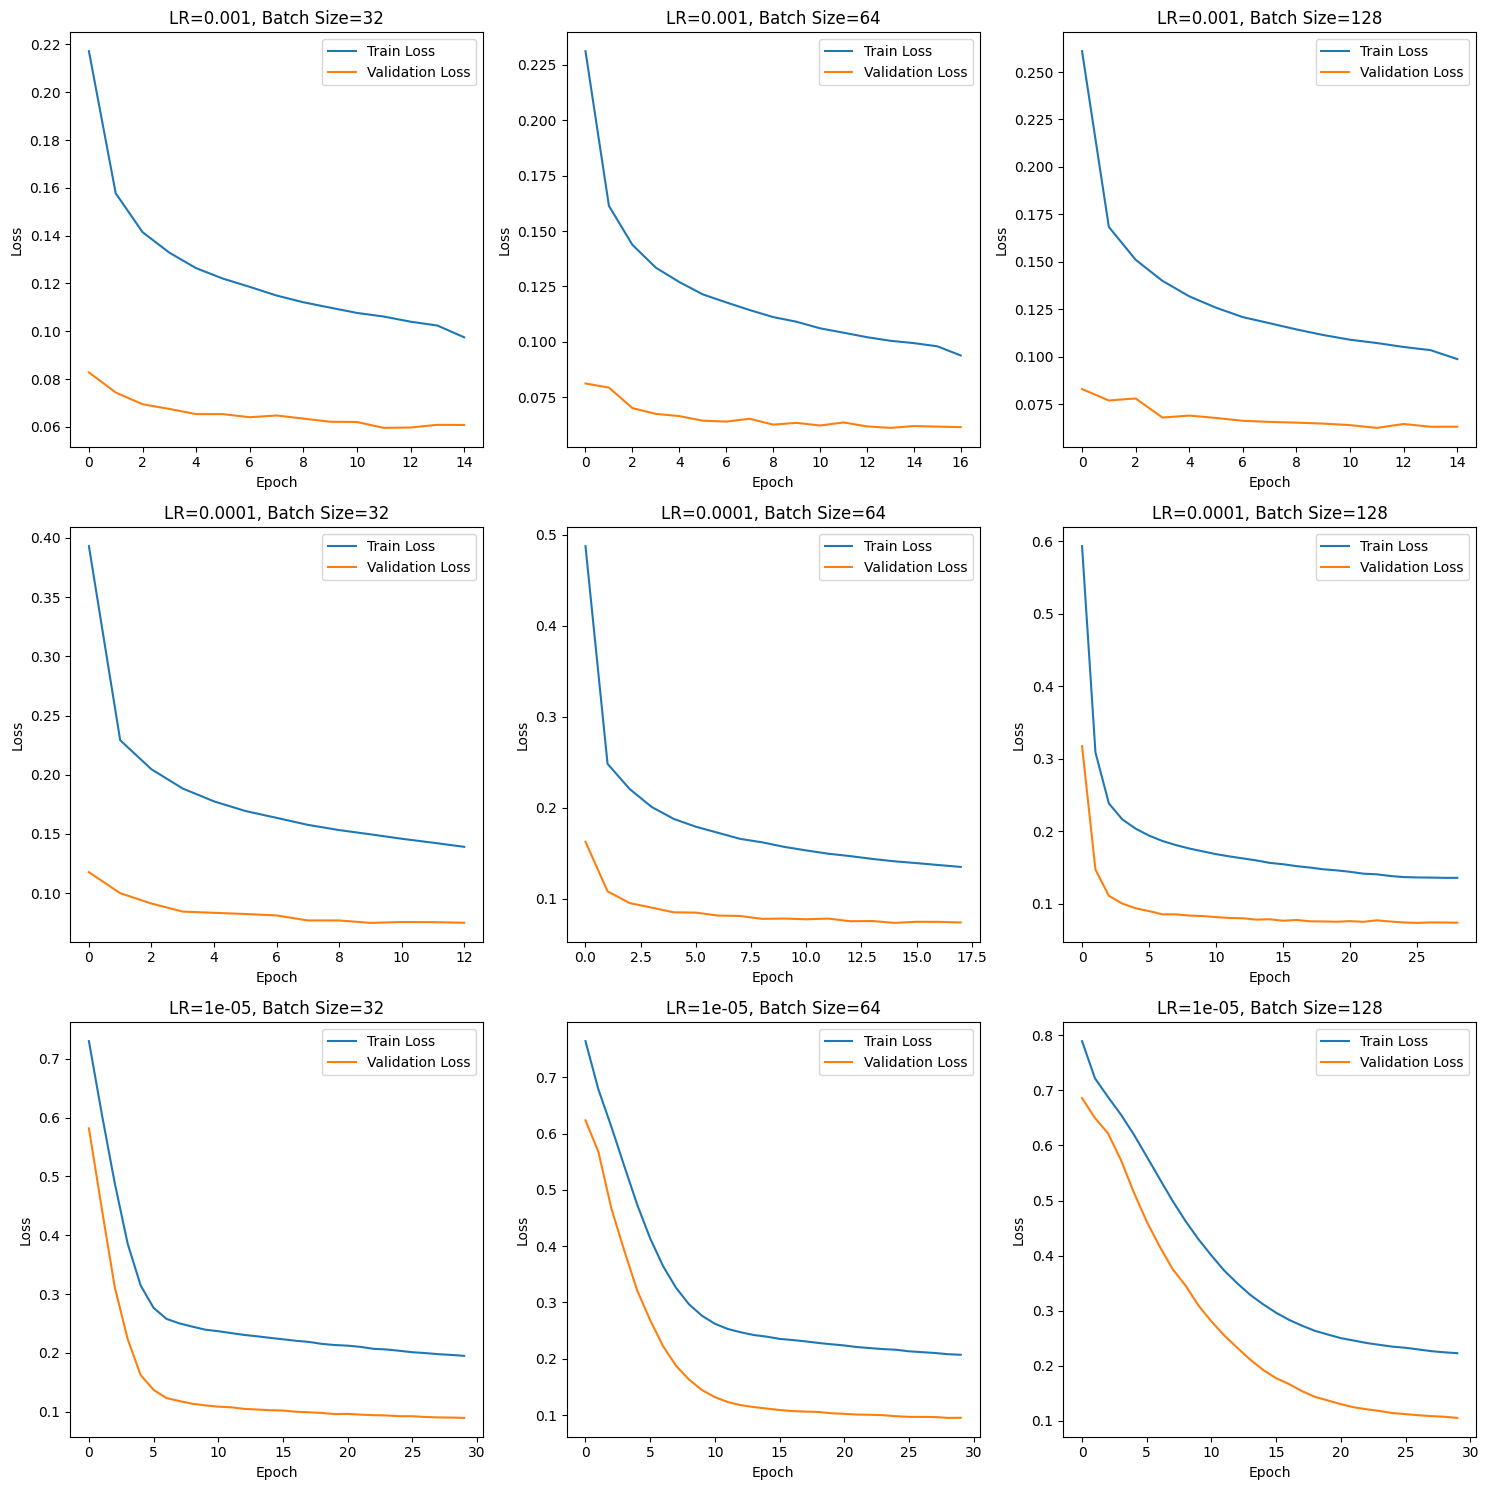

<Sequential name=sequential_1, built=True>

In [ ]:
model_fasttext_setting = ModelTrainer(model_fasttext,
                                  X_train_vectorized, y_train,
                                  X_test_vectorized, y_test,
                                  class_weights)

model_fasttext_setting.evaluate_model()

Validation loss is still lower than the training loss.
The combination chosen to analyze in more detail is learning rate 1e-3
and batch size 64, because it seems to achive the best result.

      Lr  Batch  Train Precision  Train Recall  Test Precision  Test Recall
0  1e-03     64             0.89          0.84            0.81         0.62


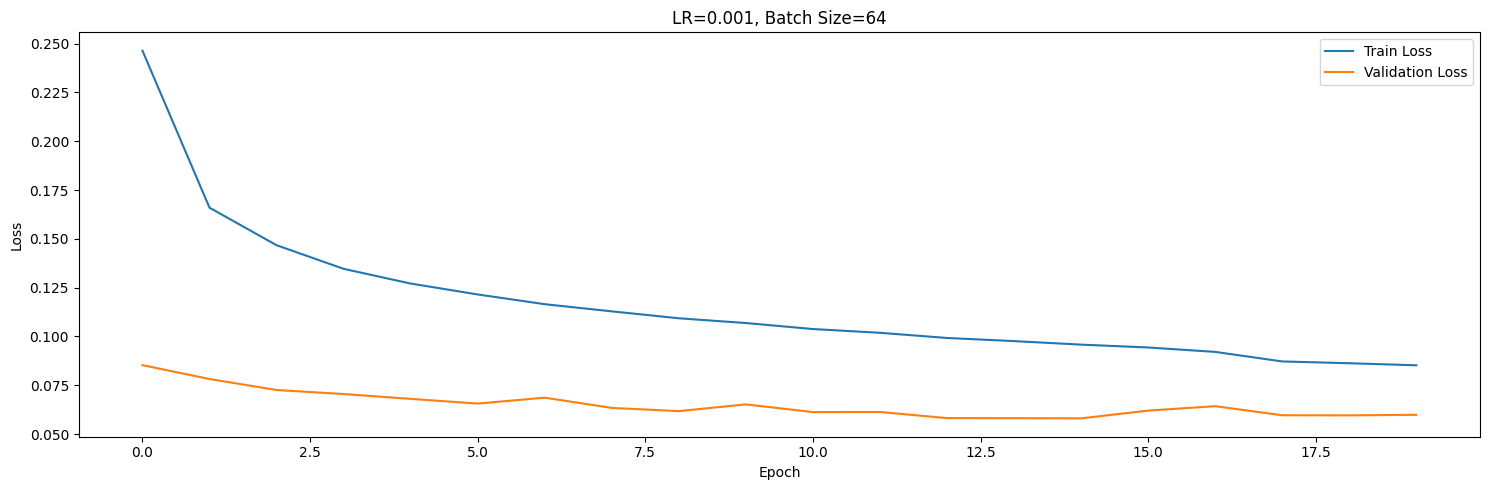

In [ ]:
model_fasttext_setting = ModelTrainer(model_fasttext,
                                      X_train_vectorized, y_train,
                                      X_test_vectorized, y_test,
                                      class_weights,
                                      learning_rates=[1e-3], batch_sizes=[64])

best_model_fasttext = model_fasttext_setting.evaluate_model()

The data augmentation improve the model's ability to generalize to previously unseen data, even if this results in a higher training loss. If the model is actually improving its performance on unseen test data, the augmentation is doing its job correctly. So let's check the results.



In [ ]:
# custom thresholds for each label
thresholds_model_fasttext = {
    'toxic': 0.1,
    'severe_toxic': 0.2,
    'obscene': 0.2,
    'threat': 0.1,
    'insult': 0.1,
    'identity_hate': 0.15
}

probability_predictions(best_model_fasttext,
                        X_test_vectorized, y_test,
                        labels, thresholds_model_fasttext)

985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Classification Report for all labels:
               precision    recall  f1-score   support

        toxic       0.65      0.80      0.72      3084
 severe_toxic       0.30      0.76      0.43       326
      obscene       0.71      0.85      0.77      1685
       threat       0.28      0.58      0.38        91
       insult       0.51      0.85      0.64      1586
identity_hate       0.36      0.61      0.45       295

    micro avg       0.57      0.81      0.67      7067
    macro avg       0.47      0.74      0.56      7067
 weighted avg       0.60      0.81      0.68      7067
  samples avg       0.06      0.08      0.06      7067



There is an improvement, but the results are not so different without using the pretrained embeddings. FastText embeddings might not be the best fit for this specific classification problem (since the data is noisy and has many rare words).

After experimenting (not shown) with various configurations of LSTM and GRU models combined with FastText embeddings (both trainable and non-trainable) and incorporating data augmentation, the best performance was achieved with LSTM with FastText embeddings set to trainable=False combined with data augmentation.

Let's try another pretrained embeddings to check how the perfromace changes.

### Model Glove

Let's start with the necessary download.

In [ ]:
# Download GloVe embeddings
glove_file_path = download_glove_embeddings()

# Load GloVe embeddings
glove_embeddings = load_glove_embeddings(glove_file_path)

GloVe embeddings downloaded and extracted to /content/glove.6B


Now we create an embedding matrix using pre-trained word embeddings, then this matrix will be used to initialize the embeddings for words in the neural network model.

In [ ]:
glove_embedding_matrix = create_embedding_matrix(tokenizer,
                                                 glove_embeddings,
                                                 num_words=vocabulary_size, embedding_dim=300)

This time too, trainable=False is set for the same reasons mentioned previously.

In [ ]:
model_glove = Sequential([
    Embedding(vocabulary_size, 300, weights=[glove_embedding_matrix], trainable=False, input_length=max_sequence_length),
    SpatialDropout1D(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    BatchNormalization(),
    Dense(len(labels), activation='sigmoid')  # Sigmoid per il multi-label
])

      Lr  Batch  Train Precision  Train Recall  Test Precision  Test Recall
0  1e-03     32             0.87          0.81            0.77         0.64
1  1e-03     64             0.86          0.78            0.76         0.63
2  1e-03    128             0.85          0.76            0.77         0.61
3  1e-04     32             0.83          0.71            0.75         0.58
4  1e-04     64             0.83          0.67            0.76         0.53
5  1e-04    128             0.82          0.63            0.74         0.52
6  1e-05     32             0.80          0.50            0.77         0.39
7  1e-05     64             0.79          0.47            0.76         0.34
8  1e-05    128             0.78          0.46            0.75         0.33


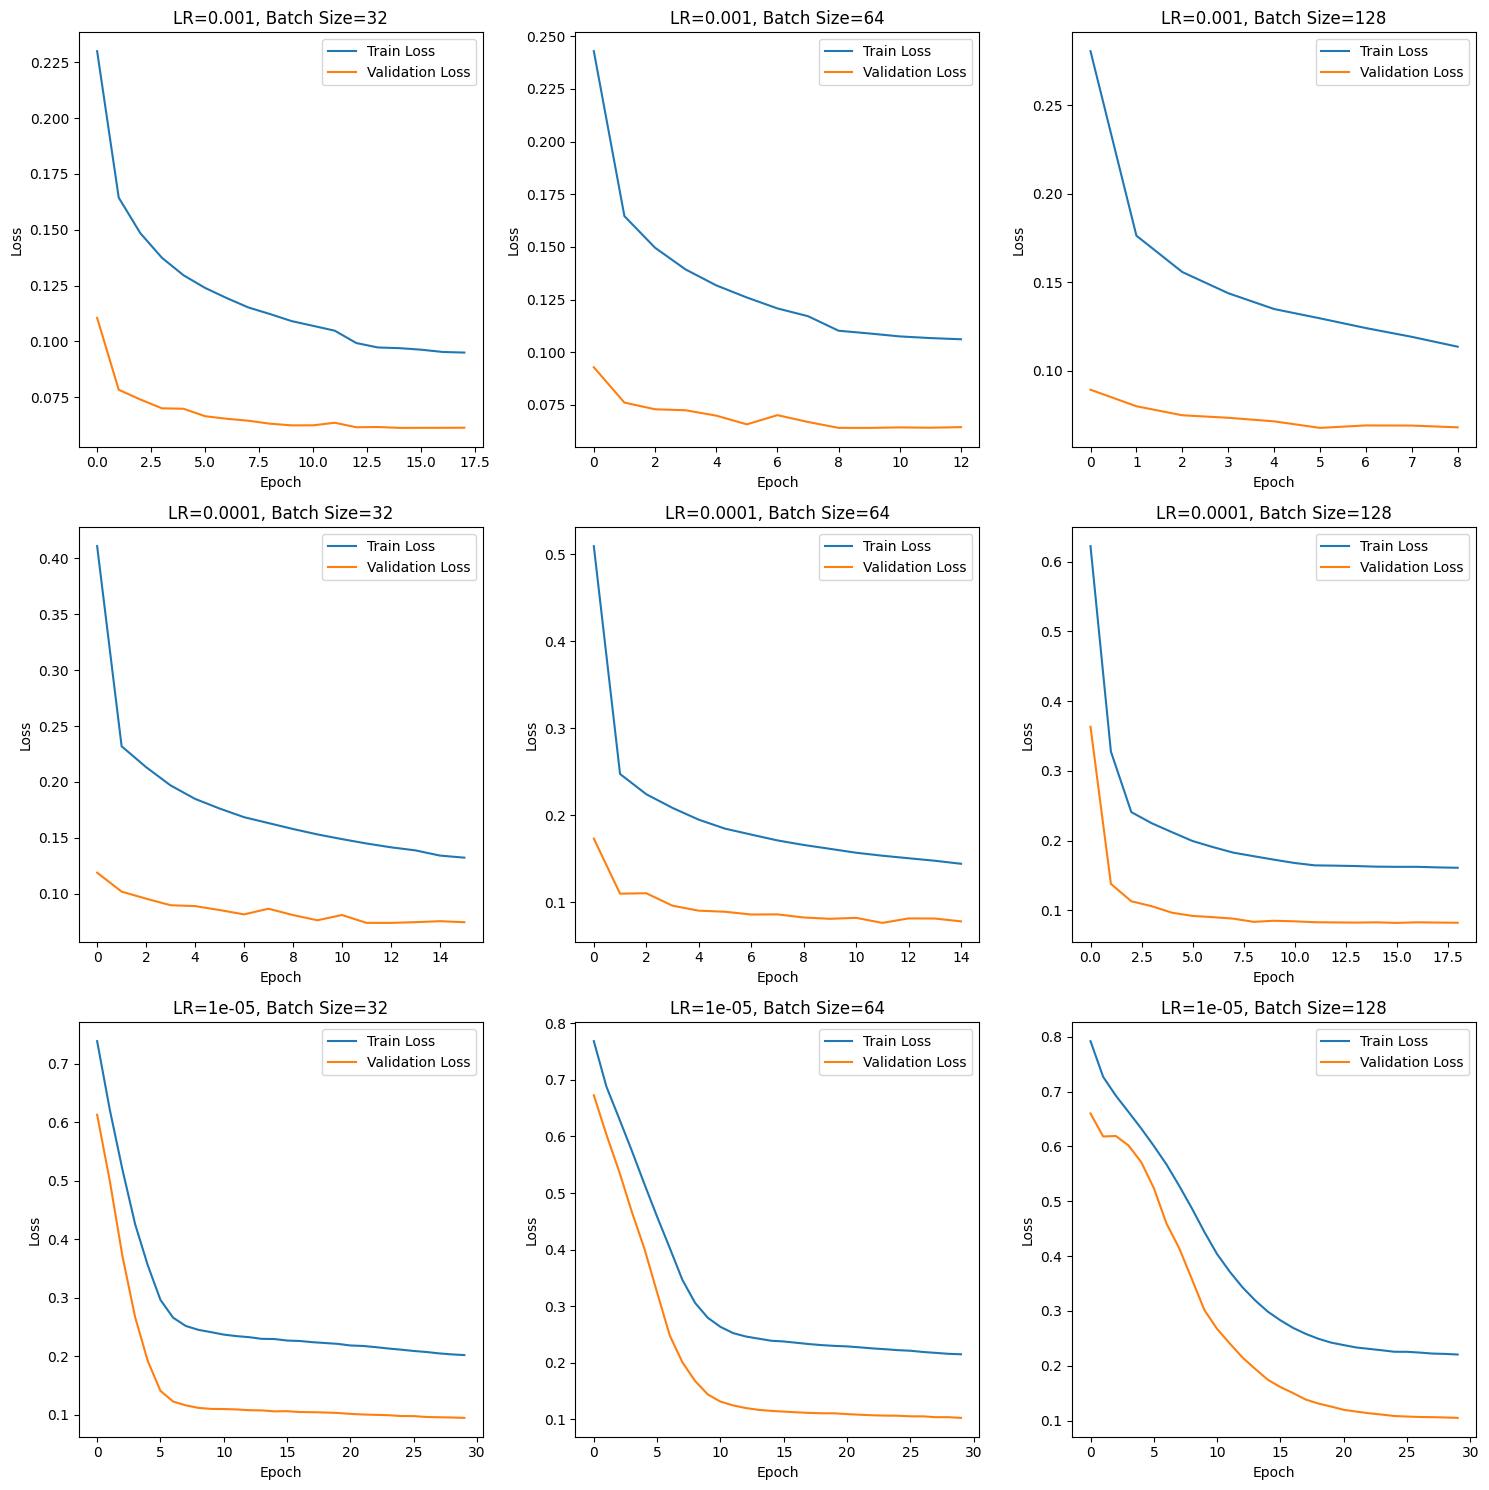

<Sequential name=sequential, built=True>

In [ ]:
model_glove_setting = ModelTrainer(model_glove,
                                  X_train_vectorized, y_train,
                                  X_test_vectorized, y_test,
                                  class_weights)

model_glove_setting.evaluate_model()

Validation loss is still lower than the training loss.

**Note**: I tested various configurations with trainable=True, and the two loss curves tend to coincide with slight overfitting, however the metrics obtained are poorer than the chosen configuration.

The combination chosen to analyze in more detail is learning rate 1e-3 and batch size 64, because it seems to achive the best result.

      Lr  Batch  Train Precision  Train Recall  Test Precision  Test Recall
0  1e-03     64             0.87          0.81            0.81          0.6


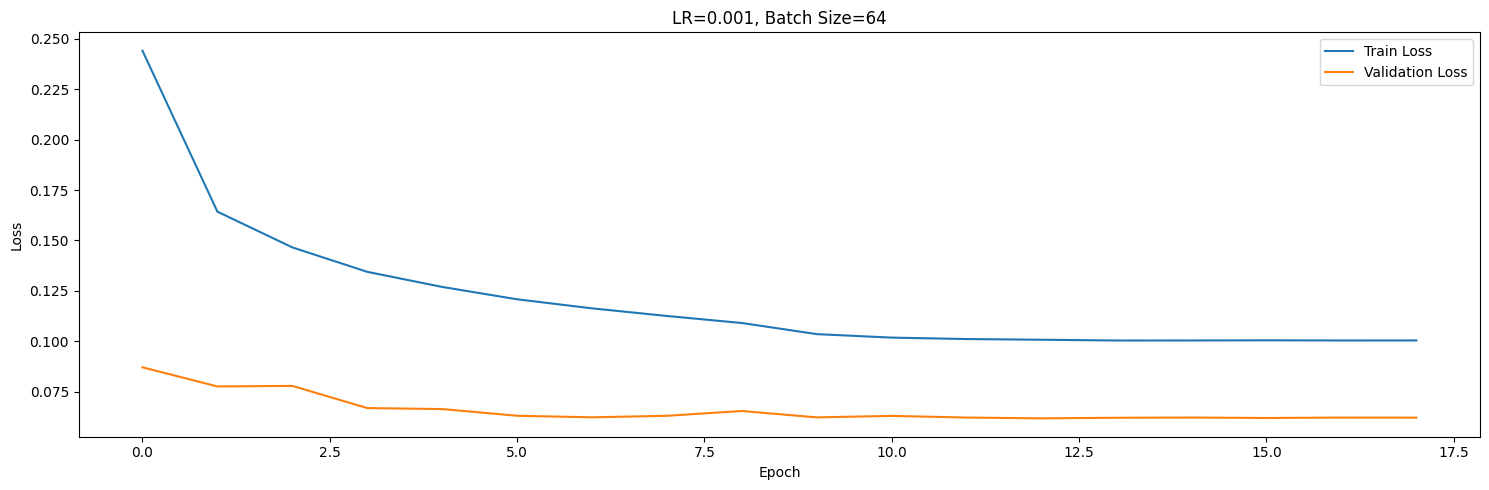

In [ ]:
model_glove_setting = ModelTrainer(model_glove,
                                      X_train_vectorized, y_train,
                                      X_test_vectorized, y_test,
                                      class_weights,
                                      learning_rates=[1e-3], batch_sizes=[64])

best_model_glove = model_glove_setting.evaluate_model()

In [ ]:
# custom thresholds for each label
thresholds_model_glove = {
    'toxic': 0.2,
    'severe_toxic': 0.095,
    'obscene': 0.2,
    'threat': 0.095,
    'insult': 0.2,
    'identity_hate': 0.15
}

probability_predictions(best_model_glove,
                        X_test_vectorized, y_test,
                        labels, thresholds_model_glove)

985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Classification Report for all labels:
               precision    recall  f1-score   support

        toxic       0.81      0.71      0.76      3084
 severe_toxic       0.24      0.86      0.38       326
      obscene       0.71      0.84      0.77      1685
       threat       0.32      0.53      0.40        91
       insult       0.60      0.78      0.68      1586
identity_hate       0.35      0.63      0.45       295

    micro avg       0.62      0.76      0.68      7067
    macro avg       0.51      0.72      0.57      7067
 weighted avg       0.69      0.76      0.71      7067
  samples avg       0.05      0.07      0.06      7067



In [ ]:
best_model_glove.save('trained_model_glove.keras')

Even if by a little, overall this is the combination that got the best results. So it will be the model that will be used for the final tests.

# Testing

In order to test it, run all the thing inside the following section in the same order:
1. Libraries
2. Utils
3. Testing

In [ ]:
# Main execution function
def main():
    # Mount the Google Drive
    mount_drive()

    # File IDs and destination paths
    tokenizer_file_id = '1fwZ0OPdcdBPGv2bt7kWKgikUsncuRZ9A'
    tokenizer_destination = '/content/drive/MyDrive/tokenizer.pkl'
    model_file_id = '1Zoqwf9Yce_CYxjbCo5HHIuJSMhn04_aT'
    model_destination = '/content/drive/MyDrive/trained_model_glove.keras'

    # Download files if not already downloaded
    download_file(tokenizer_file_id, tokenizer_destination)
    download_file(model_file_id, model_destination)

    # Load the tokenizer and model
    tokenizer = load_tokenizer(tokenizer_destination)
    model = load_trained_model(model_destination)

    if tokenizer is None or model is None:
        print("Error: Tokenizer or Model could not be loaded. Exiting.")
        return

    # Ask user for test input
    test_text = input("Enter the text for prediction: ")

    # Predict the outcome
    predictions = preprocess_and_predict(test_text, tokenizer, model)

    # Thresholds for model predictions
    thresholds_model_glove = {
        'toxic': 0.2,
        'severe_toxic': 0.095,
        'obscene': 0.2,
        'threat': 0.095,
        'insult': 0.2,
        'identity_hate': 0.15
    }

    labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

    print("\nPrediction results (0 = unlikely, 1 = likely):")
    evaluate_predictions(predictions, labels, thresholds_model_glove)

# Run the main function
if __name__ == "__main__":
    main()


Enter the text for prediction: #PleASE, SHUTTTT the fuckKKKKKKKKKK up,,,,,, or i killlllllllllllllll youuuuuuuuuuuuuuuuuuu

Prediction results (0 = unlikely, 1 = likely):
Toxic: 1
Severe_toxic: 0
Obscene: 0
Threat: 1
Insult: 1
Identity_hate: 0


# Final Thoughts and Improvements

In this multi-label text classification project, we tested various solutions ranging from traditional methods like Logistic Regression to advanced deep learning models, including GRU and LSTM, with pre-trained embeddings. Our findings provide valuable insights into the performance of different approaches, especially considering the unique characteristics of the dataset.

## Challenges Encountered

1. **Data Imbalance:**
  The dataset was imbalanced, with certain labels occurring less frequently than others. This created difficulties for deep learning models, which typically excel in capturing complex patterns but often struggle when faced with imbalanced data. The model prioritized the majority classes and overlook the minority ones, which leaded to poor generalization, especially for underrepresented labels.

2. **Noise in Text Data**:
  Text data contains noise or irrelevant components that not contribute meaningful information to the classification task. This noise impact the model's ability to focus on the most important features, thus affecting performance.

3. **Subjectivity in Label Assignment:**
  The labels were assigned by humans, introducing a subjective component to the dataset. Different annotators may interpret the same text differently, leading to inconsistencies in the labeling process. This subjective nature of labeling can introduce noise into the data, making it harder for the model to identify clear, reliable patterns.

4. **Low-Frequency Words and Out-of-Vocabulary (OOV) Issues:**
  With around 250.000 unique words in the dataset, many words had low frequencies.This results in a loss of semantic information and a potential decrease in model performance.


## Solutions Adopted

1. **Noise Removal:**
  The TextCleaner class was applied to preprocess the comments, removing irrelevant information and standardizing the text for better feature extraction. This noise reduction process helped the model focus on the important features, such as the core content of the text, while deleting extraneous data like URLs, special characters, and repetitions.

2. **Balancing Less Frequent Labels:**
   We addressed the class imbalance by calculating class weights, ensuring that the model paid more attention to the minority classes. This helped the model learn to classify underrepresented labels more effectively, improving overall performance on the multi-label classification task.

3. **Data Augmentation:**
  Data augmentation techniques were applied to help improve the model's generalization ability. The augmentation allowed the models to learn more robust features and handle a wider variety of inputs, which contributed to better performance on test data.

4. **Pre-Trained Embeddings (GloVe):**
   While deep learning models like LSTM struggled on their own, combining LSTM with pre-trained GloVe embeddings showed better results in terms of predictive metrics. This combination provided the necessary context for the model to capture the relationships between words more effectively.






## Future Work

1. **Dataset Enrichment:**
   To address the imbalance and enrich the dataset, future work could focus on gathering more diverse and domain-specific data, particularly including more toxic comments or any other underrepresented label types. This would help the model learn from a richer, more balanced dataset, improving its ability to generalize.

2. **Model and Feature Engineering Refinements:**
   Further tuning the balance between model complexity and dataset characteristics could lead to better performance. Exploring other techniques such as transformers (e.g. BERT) could be beneficial for tasks with larger datasets and more complex relationships between words.

Taken by curiosity I tried to test DistilBERT, a faster and simpler version of BERT. Below I have reported only the final results, because I had difficulty in fine tuning the hyperparameters (this was due to low computational resources, as it took hours to train a few epochs). The metrics obtained are the best but there was a clear presence of overfitting. But from what we can see we still had the same problem faced before, small dataset and unbalanced, so it doesn't provide enough information for DistilBERT to learn effectively, since DistilBERT requires a substantial amount of diverse data to fully leverage its capabilities.

In [ ]:
# # Make predictions on the test dataset
# predictions = distilbert_trainer.predict(test_dataset)

# # The predictions are in logits, convert them to probabilities using sigmoid
# probabilities = torch.sigmoid(torch.tensor(predictions.predictions))

# # Apply threshold to get binary predictions
# threshold = 0.4
# predicted_labels = (probabilities > threshold).numpy().astype(int)

# # Now you can print the classification report
# print("Classification Report for all labels:")
# print(classification_report(y_test, predicted_labels, target_names=labels, zero_division=0))

Classification Report for all labels:
               precision    recall  f1-score   support

        toxic       0.82      0.78      0.80      3084
 severe_toxic       0.32      0.77      0.45       326
      obscene       0.76      0.85      0.80      1684
       threat       0.42      0.54      0.47        91
       insult       0.66      0.77      0.72      1586
identity_hate       0.39      0.71      0.51       295

    micro avg       0.69      0.79      0.73      7066
    macro avg       0.56      0.74      0.62      7066
 weighted avg       0.72      0.79      0.75      7066
  samples avg       0.06      0.07      0.06      7066



In conclusion, for this multi-label text classification task with an unbalanced dataset and many infrequent words, Logistic Regression with TF-IDF achieved good metrics. However, combining LSTM with GloVe embeddings showed the potential for more complex scenarios, and data augmentation strategies helped improve generalization.
